# data

In [2]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn_extra.cluster import KMedoids
from sklearn.neighbors import NearestNeighbors
import plotly.express as px
import scipy.cluster.hierarchy as sch 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
import seaborn as sns

In [57]:
# pip install scikit-learn-extra

In [82]:
metadata=pd.read_csv("wine.csv")
metadata.head(10)

cultivars  Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  \
0          1    14.23        1.71  2.43          15.6        127   
1          1    13.20        1.78  2.14          11.2        100   
2          1    13.16        2.36  2.67          18.6        101   
3          1    14.37        1.95  2.50          16.8        113   
4          1    13.24        2.59  2.87          21.0        118   
5          1    14.20        1.76  2.45          15.2        112   
6          1    14.39        1.87  2.45          14.6         96   
7          1    14.06        2.15  2.61          17.6        121   
8          1    14.83        1.64  2.17          14.0         97   
9          1    13.86        1.35  2.27          16.0         98   

   Total_Phenols  Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   
5           3.27        3.39                  0.34             1.97   
6           2.50        2.52                  0.30             1.98   
7           2.60        2.51                  0.31             1.25   
8           2.80        2.98                  0.29             1.98   
9           2.98        3.15                  0.22             1.85   

   Color_Intensity   Hue  OD280  Proline  
0             5.64  1.04   3.92     1065  
1             4.38  1.05   3.40     1050  
2             5.68  1.03   3.17     1185  
3             7.80  0.86   3.45     1480  
4             4.32  1.04   2.93      735  
5             6.75  1.05   2.85     1450  
6             5.25  1.02   3.58     1290  
7             5.05  1.06   3.58     1295  
8             5.20  1.08   2.85     1045  
9             7.22  1.01   3.55     1045

In [4]:
metadata.shape

(178, 14)

In [5]:
metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cultivars             178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic_Acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Ash_Alcanity          178 non-null    float64
 5   Magnesium             178 non-null    int64  
 6   Total_Phenols         178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid_Phenols  178 non-null    float64
 9   Proanthocyanins       178 non-null    float64
 10  Color_Intensity       178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD280                 178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [6]:
metadata.isnull().sum()

cultivars               0
Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [7]:
all=metadata.copy()
all.insert(0, 'count', len(all.index))
all=all.mean(axis=0)
all

count                   178.000000
cultivars                 1.938202
Alcohol                  13.000618
Malic_Acid                2.336348
Ash                       2.366517
Ash_Alcanity             19.494944
Magnesium                99.741573
Total_Phenols             2.295112
Flavanoids                2.029270
Nonflavanoid_Phenols      0.361854
Proanthocyanins           1.590899
Color_Intensity           5.058090
Hue                       0.957449
OD280                     2.611685
Proline                 746.893258
dtype: float64

In [62]:
# Visualize the correlation your data and identify variables for further analysis
# g = sns.PairGrid(metadata, hue="corona_result",corner=True)
g = sns.PairGrid(metadata, corner=True)
g.map_diag(sns.histplot, color=".3")
g.map_offdiag(sns.scatterplot)
# g.map(sns.histplot)
# g.add_legend(title="", adjust_subtitles=True)
g.add_legend()

In [8]:
cluster0=metadata[metadata['cultivars']==1]
cluster0.insert(0, 'count', len(cluster0.index))
cluster0=cluster0.mean(axis=0)
cluster0

count                     59.000000
cultivars                  1.000000
Alcohol                   13.744746
Malic_Acid                 2.010678
Ash                        2.455593
Ash_Alcanity              17.037288
Magnesium                106.338983
Total_Phenols              2.840169
Flavanoids                 2.982373
Nonflavanoid_Phenols       0.290000
Proanthocyanins            1.899322
Color_Intensity            5.528305
Hue                        1.062034
OD280                      3.157797
Proline                 1115.711864
dtype: float64

In [9]:
cluster1=metadata[metadata['cultivars']==2]
cluster1.insert(0, 'count', len(cluster1.index))
cluster1=cluster1.mean(axis=0)
cluster1

count                    71.000000
cultivars                 2.000000
Alcohol                  12.278732
Malic_Acid                1.932676
Ash                       2.244789
Ash_Alcanity             20.238028
Magnesium                94.549296
Total_Phenols             2.258873
Flavanoids                2.080845
Nonflavanoid_Phenols      0.363662
Proanthocyanins           1.630282
Color_Intensity           3.086620
Hue                       1.056282
OD280                     2.785352
Proline                 519.507042
dtype: float64

In [10]:
cluster2=metadata[metadata['cultivars']==3]
cluster2.insert(0, 'count', len(cluster2.index))
cluster2=cluster2.mean(axis=0)
cluster2

count                    48.000000
cultivars                 3.000000
Alcohol                  13.153750
Malic_Acid                3.333750
Ash                       2.437083
Ash_Alcanity             21.416667
Magnesium                99.312500
Total_Phenols             1.678750
Flavanoids                0.781458
Nonflavanoid_Phenols      0.447500
Proanthocyanins           1.153542
Color_Intensity           7.396250
Hue                       0.682708
OD280                     1.683542
Proline                 629.895833
dtype: float64

In [12]:
result_original=pd.concat([all, cluster0, cluster1, cluster2], axis=1, join='inner')
result_original.columns=['all', 'cultivar 1', 'cultivar 2', 'cultivar 3']
result_original

all   cultivar 1  cultivar 2  cultivar 3
count                 178.000000    59.000000   71.000000   48.000000
cultivars               1.938202     1.000000    2.000000    3.000000
Alcohol                13.000618    13.744746   12.278732   13.153750
Malic_Acid              2.336348     2.010678    1.932676    3.333750
Ash                     2.366517     2.455593    2.244789    2.437083
Ash_Alcanity           19.494944    17.037288   20.238028   21.416667
Magnesium              99.741573   106.338983   94.549296   99.312500
Total_Phenols           2.295112     2.840169    2.258873    1.678750
Flavanoids              2.029270     2.982373    2.080845    0.781458
Nonflavanoid_Phenols    0.361854     0.290000    0.363662    0.447500
Proanthocyanins         1.590899     1.899322    1.630282    1.153542
Color_Intensity         5.058090     5.528305    3.086620    7.396250
Hue                     0.957449     1.062034    1.056282    0.682708
OD280                   2.611685     3.157797    2.785352    1.683542
Proline               746.893258  1115.711864  519.507042  629.895833

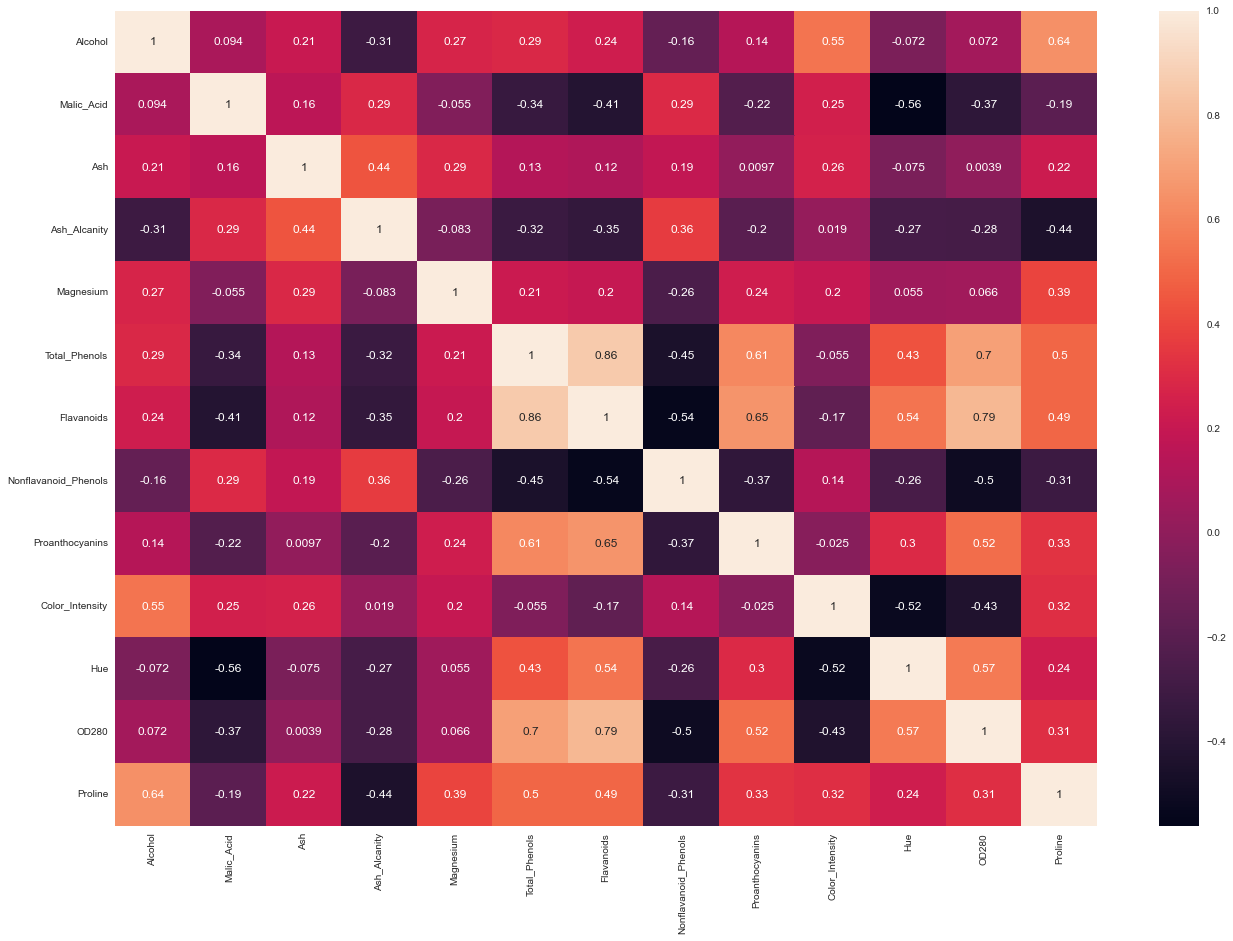

In [ ]:
#Correlation Analysis
plt.figure(figsize=(22,15))
sns.heatmap(metadata.corr(), annot=True)
plt.show()

# KMeans

In [34]:
silhouette_avg = []
inertia_list = []
for i in range(3,11):
    kmeans_fit = KMeans(n_clusters = i, init='k-means++', random_state=2022).fit(metadata)
    silhouette_avg.append(silhouette_score(metadata, kmeans_fit.labels_))
    inertia_list.append(kmeans_fit.inertia_)

Text(0.5, 1.0, 'Different Inertia Values for Different Number of Clusters')

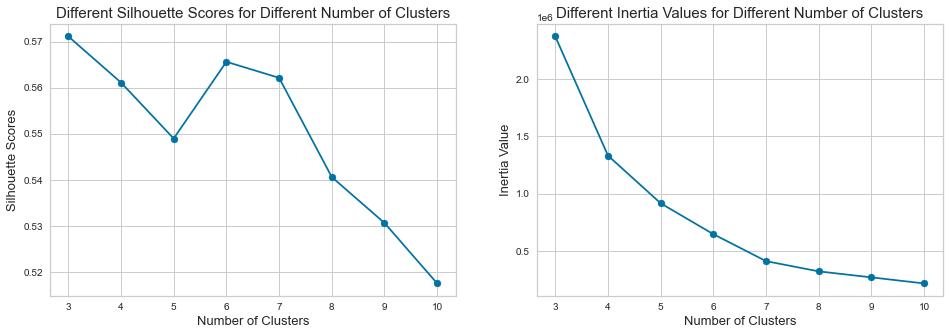

In [36]:
plt.rcParams['figure.figsize'] = [16,5]
sns.set_style("whitegrid")
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

plt.subplot(121)
plt.plot(range(3, 11), silhouette_avg)
plt.scatter(range(3, 11), silhouette_avg)
plt.xlabel("Number of Clusters", size=13)
plt.ylabel("Silhouette Scores", size=13)
plt.title("Different Silhouette Scores for Different Number of Clusters", size=15)

plt.subplot(122)
plt.plot(range(3,11),inertia_list)
plt.scatter(range(3,11),inertia_list)
plt.xlabel("Number of Clusters", size=13)
plt.ylabel("Inertia Value", size=13)
plt.title("Different Inertia Values for Different Number of Clusters", size=15)

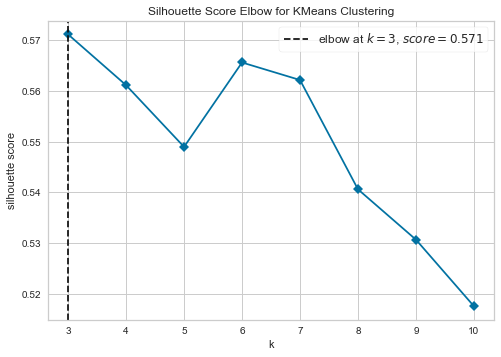

In [20]:
kmeans = KMeans(random_state=2022, init='k-means++')
kviz = KElbowVisualizer(kmeans, k=(3,11), metric='silhouette', timings=False)
kviz.fit(metadata)
kviz.show()
plt.show()

In [21]:
#Train the Model
data_kmeans=metadata.copy()
kmeans = KMeans(n_clusters=3, random_state=2022, init='k-means++').fit(data_kmeans)
data_kmeans['cluster'] = kmeans.labels_
metadata['cluster for kmeans']=kmeans.labels_

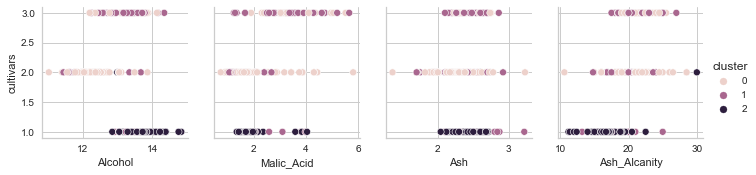

In [37]:
# Visualize the correlation your data and identify variables for further analysis
# g = sns.PairGrid(metadata, hue="corona_result",corner=True)
# x_vars=['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium', 'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols', 'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline']
x_vars=['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity']
g = sns.PairGrid(data_kmeans,x_vars=x_vars, y_vars='cultivars', hue="cluster")
g.map(sns.scatterplot)
# g.map(sns.histplot)
# g.add_legend(title="", adjust_subtitles=True)
g.add_legend()

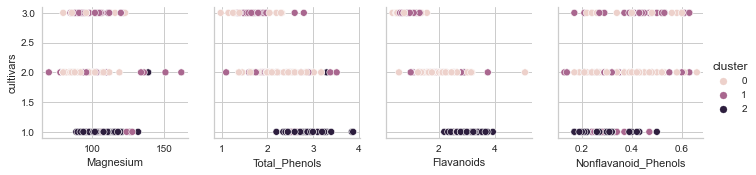

In [38]:
# Visualize the correlation your data and identify variables for further analysis
# g = sns.PairGrid(metadata, hue="corona_result",corner=True)
# x_vars=['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium', 'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols', 'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline']
x_vars=['Magnesium', 'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols']
g = sns.PairGrid(data_kmeans,x_vars=x_vars, y_vars='cultivars', hue="cluster")
g.map(sns.scatterplot)
# g.map(sns.histplot)
# g.add_legend(title="", adjust_subtitles=True)
g.add_legend()

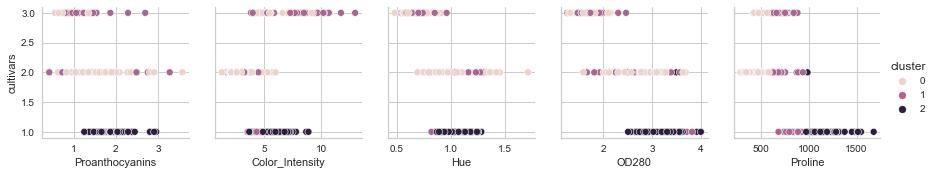

In [39]:
# Visualize the correlation your data and identify variables for further analysis
# g = sns.PairGrid(metadata, hue="corona_result",corner=True)
# x_vars=['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium', 'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols', 'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline']
x_vars=['Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline']
g = sns.PairGrid(data_kmeans,x_vars=x_vars, y_vars='cultivars', hue="cluster")
g.map(sns.scatterplot)
# g.map(sns.histplot)
# g.add_legend(title="", adjust_subtitles=True)
g.add_legend()

inertia: within cluster sum of squres, 各sample到各該群的centroid的距離之平方和，用來評估cluster的成效，越大代表越差

In [23]:
kmeans.inertia_

2370742.304590057

查看各cluster的中心，並在圖上畫出

In [24]:
kmeans.cluster_centers_

array([[ 2.27536232e+00,  1.25166667e+01,  2.49420290e+00,
         2.28855072e+00,  2.08231884e+01,  9.23478261e+01,
         2.07072464e+00,  1.75840580e+00,  3.90144928e-01,
         1.45188406e+00,  4.08695651e+00,  9.41159420e-01,
         2.49072464e+00,  4.58231884e+02, -7.77156117e-16],
       [ 2.25806452e+00,  1.29298387e+01,  2.50403226e+00,
         2.40806452e+00,  1.98903226e+01,  1.03596774e+02,
         2.11112903e+00,  1.58403226e+00,  3.88387097e-01,
         1.50338710e+00,  5.65032258e+00,  8.83967742e-01,
         2.36548387e+00,  7.28338710e+02,  2.00000000e+00],
       [ 1.02127660e+00,  1.38044681e+01,  1.88340426e+00,
         2.42617021e+00,  1.70234043e+01,  1.05510638e+02,
         2.86723404e+00,  3.01425532e+00,  2.85319149e-01,
         1.91042553e+00,  5.70255319e+00,  1.07829787e+00,
         3.11404255e+00,  1.19514894e+03,  1.00000000e+00]])

In [27]:
all=data_kmeans.copy()
all.insert(0, 'count', len(all.index))
all=all.mean(axis=0)
all

count                   178.000000
cultivars                 1.938202
Alcohol                  13.000618
Malic_Acid                2.336348
Ash                       2.366517
Ash_Alcanity             19.494944
Magnesium                99.741573
Total_Phenols             2.295112
Flavanoids                2.029270
Nonflavanoid_Phenols      0.361854
Proanthocyanins           1.590899
Color_Intensity           5.058090
Hue                       0.957449
OD280                     2.611685
Proline                 746.893258
cluster for kmeans        0.960674
cluster                   0.876404
dtype: float64

In [28]:
cluster0=data_kmeans[data_kmeans['cluster']==0]
cluster0.insert(0, 'count', len(cluster0.index))
cluster0=cluster0.mean(axis=0)
cluster0

count                    69.000000
cultivars                 2.275362
Alcohol                  12.516667
Malic_Acid                2.494203
Ash                       2.288551
Ash_Alcanity             20.823188
Magnesium                92.347826
Total_Phenols             2.070725
Flavanoids                1.758406
Nonflavanoid_Phenols      0.390145
Proanthocyanins           1.451884
Color_Intensity           4.086957
Hue                       0.941159
OD280                     2.490725
Proline                 458.231884
cluster for kmeans        0.000000
cluster                   0.000000
dtype: float64

In [29]:
cluster1=data_kmeans[data_kmeans['cluster']==1]
cluster1.insert(0, 'count', len(cluster1.index))
cluster1=cluster1.mean(axis=0)

In [30]:
cluster2=data_kmeans[data_kmeans['cluster']==2]
cluster2.insert(0, 'count', len(cluster2.index))
cluster2=cluster2.mean(axis=0)

In [31]:
result_kmeans=pd.concat([all, cluster0, cluster1, cluster2], axis=1, join='inner')
result_kmeans.columns=['all', 'KMeans cluster 0', 'KMeans cluster 1', 'KMeans cluster 2']
result_kmeans.drop('cluster')

all  KMeans cluster 0  KMeans cluster 1  \
count                 178.000000         69.000000         62.000000   
cultivars               1.938202          2.275362          2.258065   
Alcohol                13.000618         12.516667         12.929839   
Malic_Acid              2.336348          2.494203          2.504032   
Ash                     2.366517          2.288551          2.408065   
Ash_Alcanity           19.494944         20.823188         19.890323   
Magnesium              99.741573         92.347826        103.596774   
Total_Phenols           2.295112          2.070725          2.111129   
Flavanoids              2.029270          1.758406          1.584032   
Nonflavanoid_Phenols    0.361854          0.390145          0.388387   
Proanthocyanins         1.590899          1.451884          1.503387   
Color_Intensity         5.058090          4.086957          5.650323   
Hue                     0.957449          0.941159          0.883968   
OD280                   2.611685          2.490725          2.365484   
Proline               746.893258        458.231884        728.338710   
cluster for kmeans      0.960674          0.000000          2.000000   

                      KMeans cluster 2  
count                        47.000000  
cultivars                     1.021277  
Alcohol                      13.804468  
Malic_Acid                    1.883404  
Ash                           2.426170  
Ash_Alcanity                 17.023404  
Magnesium                   105.510638  
Total_Phenols                 2.867234  
Flavanoids                    3.014255  
Nonflavanoid_Phenols          0.285319  
Proanthocyanins               1.910426  
Color_Intensity               5.702553  
Hue                           1.078298  
OD280                         3.114043  
Proline                    1195.148936  
cluster for kmeans            1.000000

c:\Users\betty\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


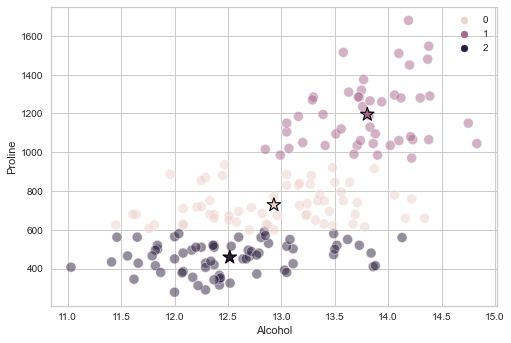

In [ ]:
ax = sns.scatterplot(data= metadata, x='Alcohol', y='Proline', hue=kmeans.labels_, alpha=0.5, s=100)
ax = sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 12],
                     hue=range(3), s=200,marker='*', ec='black', legend=False, ax=ax)

c:\Users\betty\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


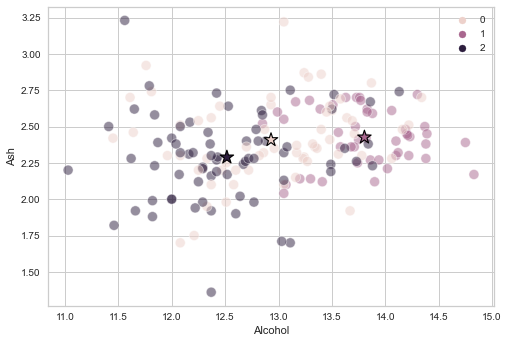

In [ ]:
ax = sns.scatterplot(data= metadata, x='Alcohol', y='Ash', hue=kmeans.labels_, alpha=0.5, s=100)
ax = sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 2],
                     hue=range(3), s=200,marker='*', ec='black', legend=False, ax=ax)

In [ ]:
def show_centers(x, y, centers, color, label):
    x_col = metadata.columns.get_loc(x.name)
    if y is None: # for the histograms
        plt.axvline(centers[label, x_col], color='r', ls=':')
    else:
        y_col = metadata.columns.get_loc(y.name)
        plt.scatter(centers[label, x_col], centers[label, y_col], marker='*', color='r', s=50)

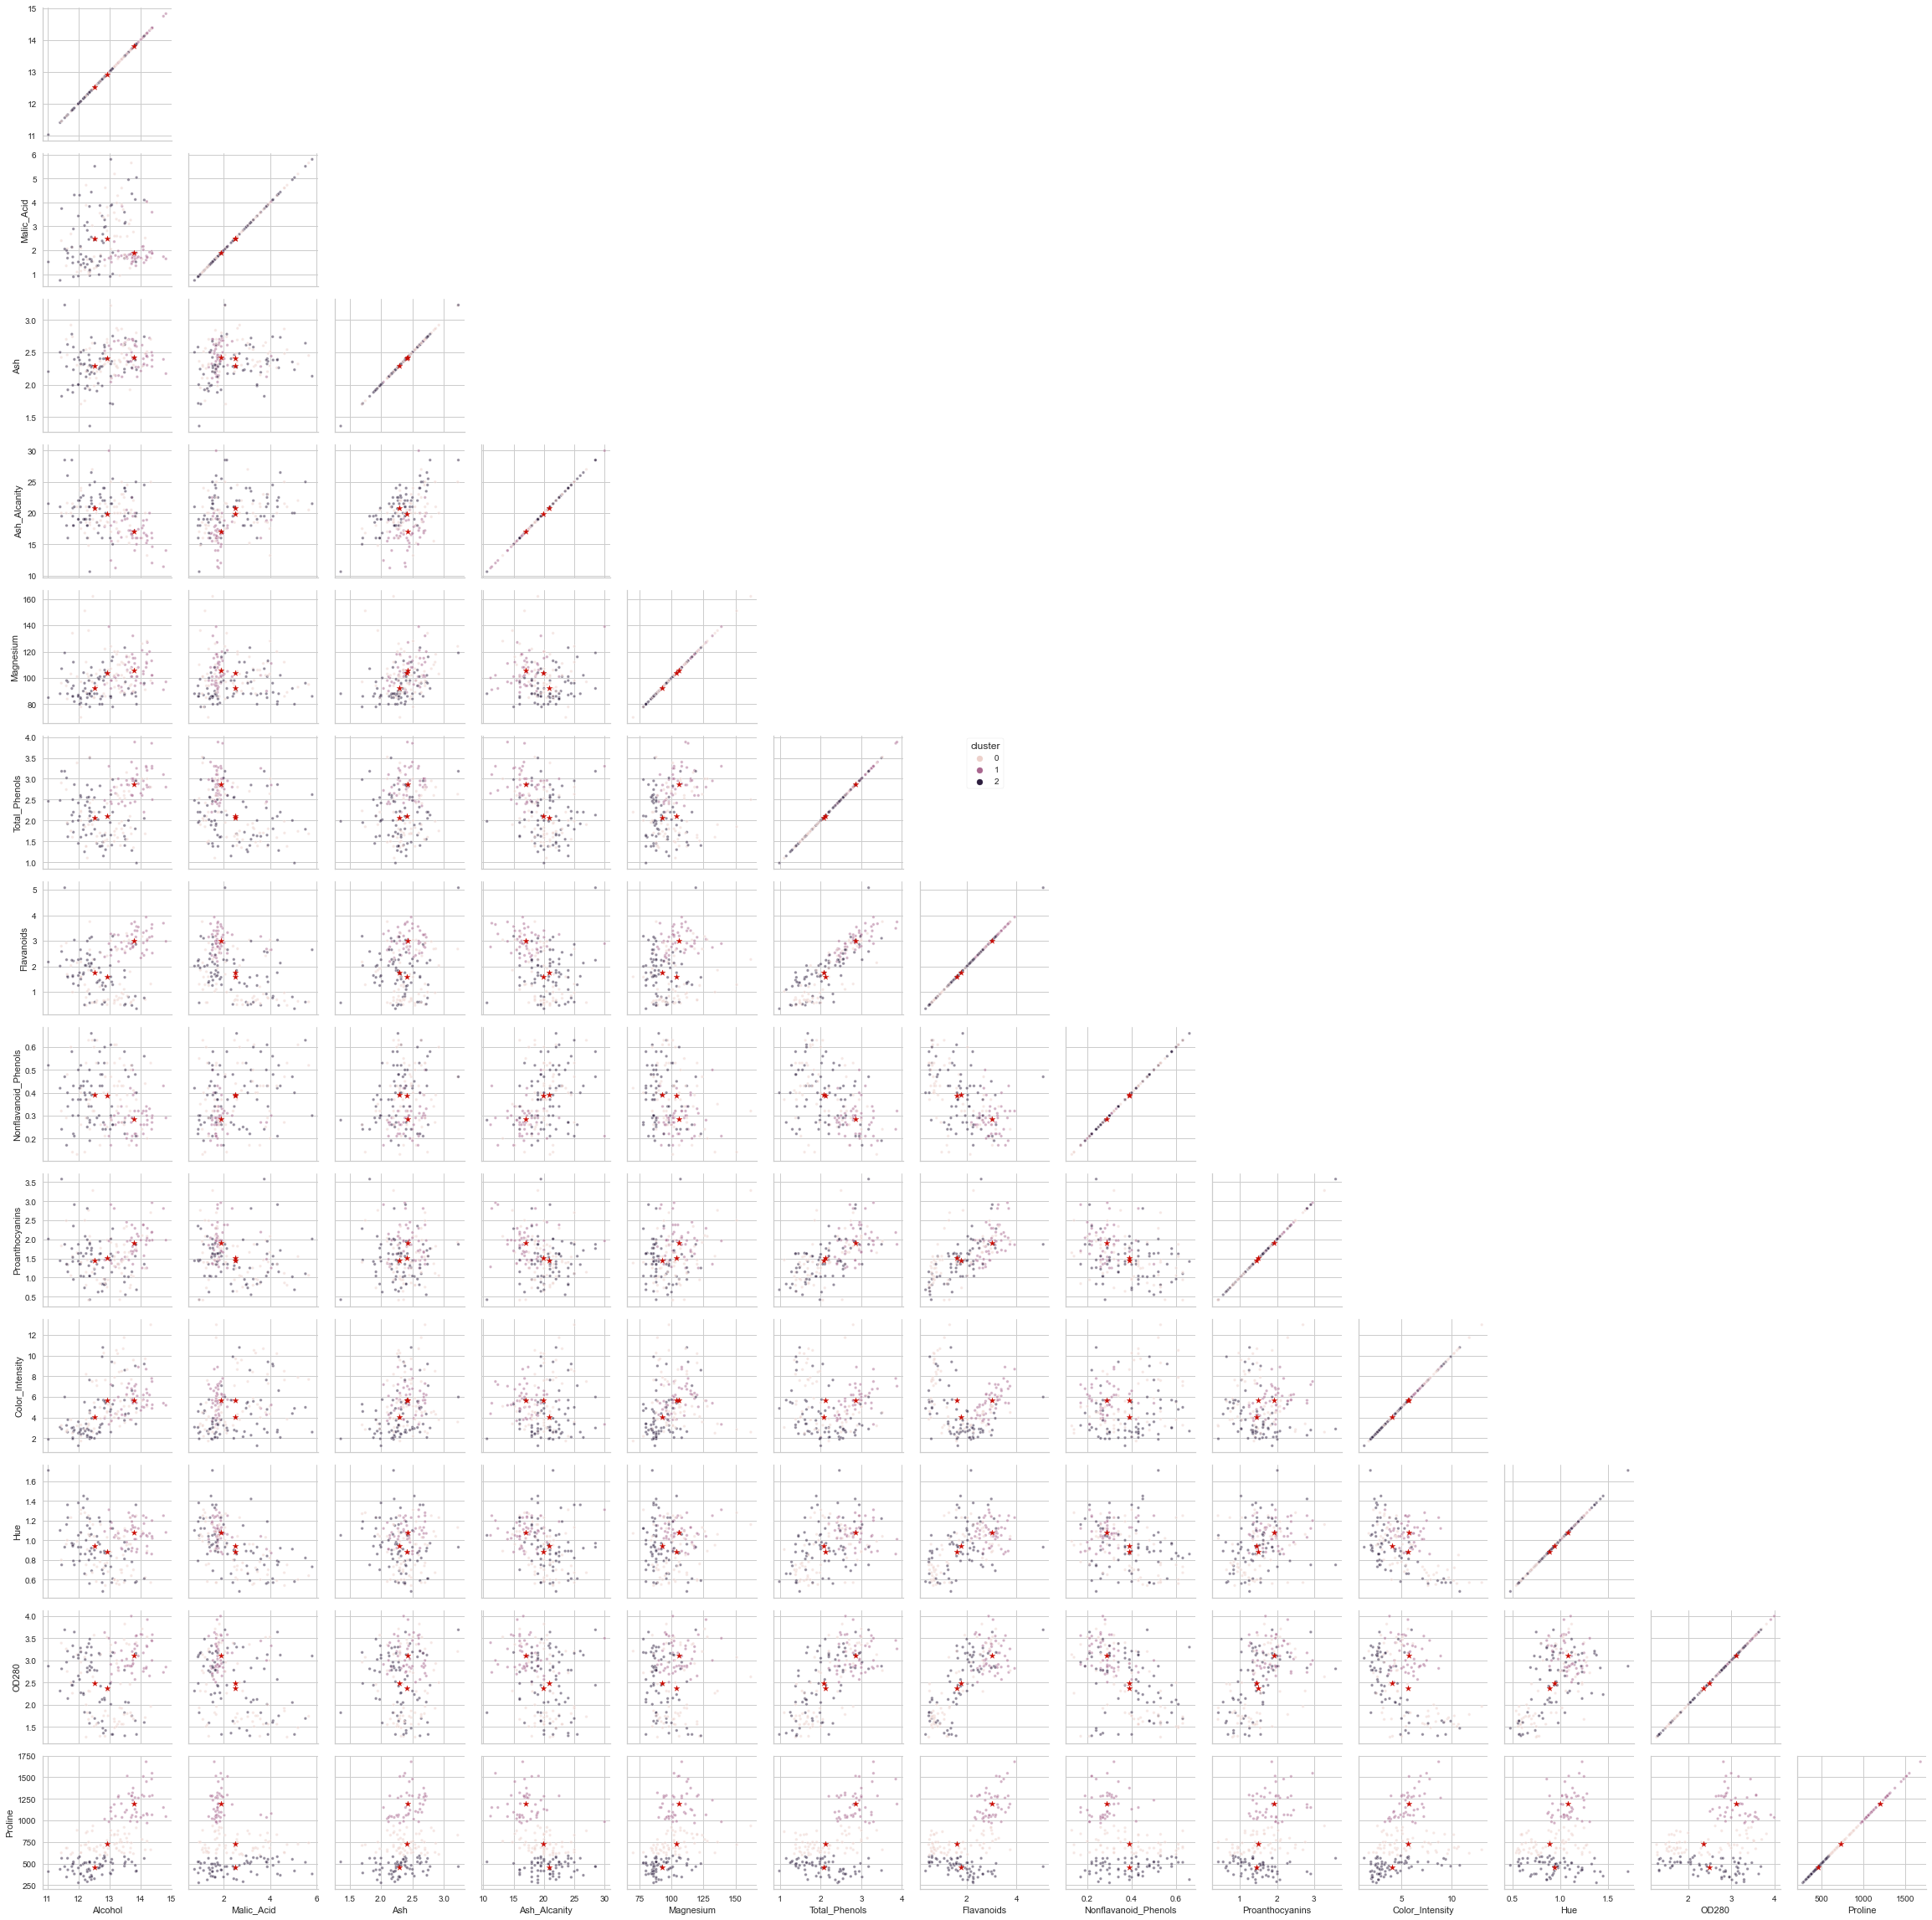

In [ ]:
# Visualize the correlation your data and identify variables for further analysis
# g = sns.PairGrid(metadata, hue="corona_result",corner=True)
g = sns.PairGrid(metadata, hue="cluster", corner=True)
g.map_diag(sns.histplot, color=".3")
g.map_offdiag(sns.scatterplot)
g.map(show_centers, centers=kmeans.cluster_centers_)
# g.map(sns.scatterplot(alpha=0.5))
# g.map(sns.scatterplot(data=kmeans.cluster_centers_, s=200,marker='*', ec='black', legend=False))
# g.map(sns.histplot)
# g.add_legend(title="", adjust_subtitles=True)
g.add_legend(frameon=True, bbox_to_anchor=(.5, .6), loc='center', title='cluster')

# KMedoids

In [83]:
silhouette_avg = []
inertia_list = []
for i in range(3,11):
    kmedoids_fit = KMedoids(n_clusters = i, init='k-medoids++', random_state=2022).fit(metadata)
    silhouette_avg.append(silhouette_score(metadata, kmedoids_fit.labels_))
    inertia_list.append(kmedoids_fit.inertia_)

Text(0.5, 1.0, 'Different Inertia Values for Different Number of Clusters')

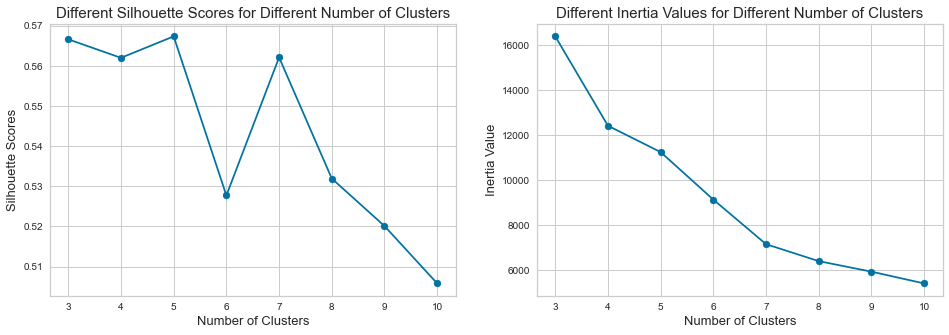

In [84]:
plt.rcParams['figure.figsize'] = [16,5]
sns.set_style("whitegrid")
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

plt.subplot(121)
plt.plot(range(3, 11), silhouette_avg)
plt.scatter(range(3, 11), silhouette_avg)
plt.xlabel("Number of Clusters", size=13)
plt.ylabel("Silhouette Scores", size=13)
plt.title("Different Silhouette Scores for Different Number of Clusters", size=15)

plt.subplot(122)
plt.plot(range(3,11),inertia_list)
plt.scatter(range(3,11),inertia_list)
plt.xlabel("Number of Clusters", size=13)
plt.ylabel("Inertia Value", size=13)
plt.title("Different Inertia Values for Different Number of Clusters", size=15)

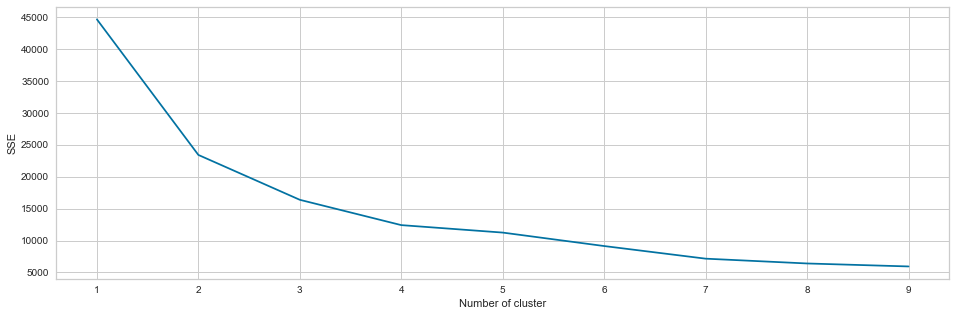

In [40]:
sse = {} 

# for k in range(1, 10):
#     kmedo = KMedoids(n_clusters=k, max_iter=1000, random_state=1).fit(metadata)
#     sse[k] = kmedo.inertia_

for k in range(1, 10):
    kmedo = KMedoids(n_clusters=k, random_state=2022, init='k-medoids++').fit(metadata)
    sse[k] = kmedo.inertia_

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()), 'bx-')
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

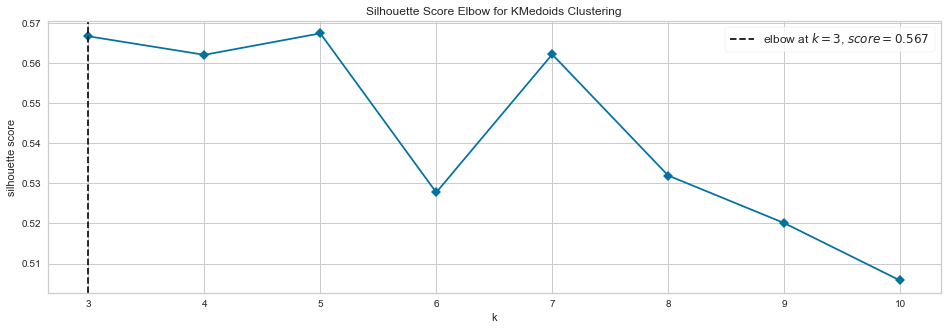

In [41]:
kmedoids=KMedoids(random_state=2022, init='k-medoids++')
kmviz = KElbowVisualizer(kmedoids, k=(3,11), metric='silhouette', timings=False)
kmviz.fit(metadata)
kmviz.show()
plt.show()

In [42]:
#Train the Model
kmedoids = KMedoids(n_clusters=3, random_state=2022).fit(metadata)
kmed=metadata.copy()
kmed['cluster'] = kmedoids.labels_
metadata['cluster for kmedoids']=kmedoids.labels_

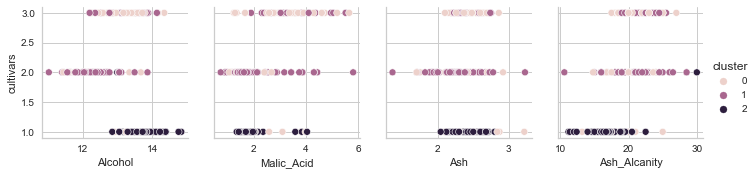

In [52]:
# Visualize the correlation your data and identify variables for further analysis
# g = sns.PairGrid(metadata, hue="corona_result",corner=True)
# x_vars=['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium', 'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols', 'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline']
x_vars=['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity']
g = sns.PairGrid(kmed,x_vars=x_vars, y_vars='cultivars', hue="cluster")
g.map(sns.scatterplot)
# g.map(sns.histplot)
# g.add_legend(title="", adjust_subtitles=True)
g.add_legend()

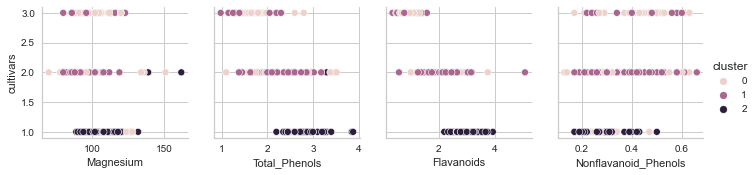

In [53]:
# Visualize the correlation your data and identify variables for further analysis
# g = sns.PairGrid(metadata, hue="corona_result",corner=True)
# x_vars=['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium', 'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols', 'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline']
x_vars=['Magnesium', 'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols']
g = sns.PairGrid(kmed,x_vars=x_vars, y_vars='cultivars', hue="cluster")
g.map(sns.scatterplot)
# g.map(sns.histplot)
# g.add_legend(title="", adjust_subtitles=True)
g.add_legend()

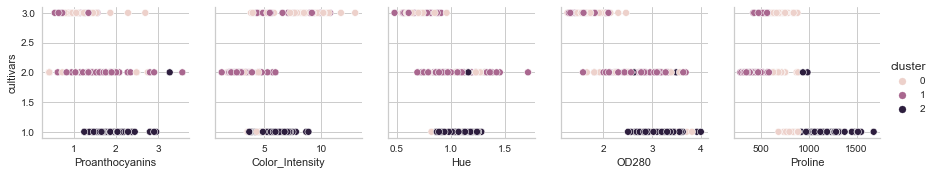

In [54]:
# Visualize the correlation your data and identify variables for further analysis
# g = sns.PairGrid(metadata, hue="corona_result",corner=True)
# x_vars=['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium', 'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols', 'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline']
x_vars=['Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline']
g = sns.PairGrid(kmed,x_vars=x_vars, y_vars='cultivars', hue="cluster")
g.map(sns.scatterplot)
# g.map(sns.histplot)
# g.add_legend(title="", adjust_subtitles=True)
g.add_legend()

In [43]:
kmedoids.inertia_

16377.819298095106

In [ ]:
kmedoids.cluster_centers_

array([[1.260e+01, 2.460e+00, 2.200e+00, 1.850e+01, 9.400e+01, 1.620e+00,
        6.600e-01, 6.300e-01, 9.400e-01, 7.100e+00, 7.300e-01, 1.580e+00,
        6.950e+02],
       [1.349e+01, 1.660e+00, 2.240e+00, 2.400e+01, 8.700e+01, 1.880e+00,
        1.840e+00, 2.700e-01, 1.030e+00, 3.740e+00, 9.800e-01, 2.780e+00,
        4.720e+02],
       [1.383e+01, 1.570e+00, 2.620e+00, 2.000e+01, 1.150e+02, 2.950e+00,
        3.400e+00, 4.000e-01, 1.720e+00, 6.600e+00, 1.130e+00, 2.570e+00,
        1.130e+03]])

In [ ]:
kmed

Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0      14.23        1.71  2.43          15.6        127           2.80   
1      13.20        1.78  2.14          11.2        100           2.65   
2      13.16        2.36  2.67          18.6        101           2.80   
3      14.37        1.95  2.50          16.8        113           3.85   
4      13.24        2.59  2.87          21.0        118           2.80   
..       ...         ...   ...           ...        ...            ...   
173    13.71        5.65  2.45          20.5         95           1.68   
174    13.40        3.91  2.48          23.0        102           1.80   
175    13.27        4.28  2.26          20.0        120           1.59   
176    13.17        2.59  2.37          20.0        120           1.65   
177    14.13        4.10  2.74          24.5         96           2.05   

     Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0          3.06                  0.28             2.29             5.64  1.04   
1          2.76                  0.26             1.28             4.38  1.05   
2          3.24                  0.30             2.81             5.68  1.03   
3          3.49                  0.24             2.18             7.80  0.86   
4          2.69                  0.39             1.82             4.32  1.04   
..          ...                   ...              ...              ...   ...   
173        0.61                  0.52             1.06             7.70  0.64   
174        0.75                  0.43             1.41             7.30  0.70   
175        0.69                  0.43             1.35            10.20  0.59   
176        0.68                  0.53             1.46             9.30  0.60   
177        0.76                  0.56             1.35             9.20  0.61   

     OD280  Proline  cluster  
0     3.92     1065        2  
1     3.40     1050        2  
2     3.17     1185        2  
3     3.45     1480        2  
4     2.93      735        0  
..     ...      ...      ...  
173   1.74      740        0  
174   1.56      750        0  
175   1.56      835        0  
176   1.62      840        0  
177   1.60      560        1  

[178 rows x 14 columns]

In [44]:
all=kmed.copy()
all.insert(0, 'count', len(all.index))
all=all.mean(axis=0)
all

count                   178.000000
cultivars                 1.938202
Alcohol                  13.000618
Malic_Acid                2.336348
Ash                       2.366517
Ash_Alcanity             19.494944
Magnesium                99.741573
Total_Phenols             2.295112
Flavanoids                2.029270
Nonflavanoid_Phenols      0.361854
Proanthocyanins           1.590899
Color_Intensity           5.058090
Hue                       0.957449
OD280                     2.611685
Proline                 746.893258
cluster for kmeans        0.876404
cluster                   0.943820
dtype: float64

In [45]:
cluster0=kmed[kmed['cluster']==0]
cluster0.insert(0, 'count', len(cluster0.index))
cluster0=cluster0.mean(axis=0)
cluster0

count                    60.000000
cultivars                 2.316667
Alcohol                  12.911167
Malic_Acid                2.549667
Ash                       2.408333
Ash_Alcanity             19.971667
Magnesium               102.583333
Total_Phenols             2.084333
Flavanoids                1.509833
Nonflavanoid_Phenols      0.394333
Proanthocyanins           1.452000
Color_Intensity           5.717333
Hue                       0.870767
OD280                     2.321833
Proline                 716.250000
cluster for kmeans        0.983333
cluster                   0.000000
dtype: float64

In [46]:
cluster1=kmed[kmed['cluster']==1]
cluster1.insert(0, 'count', len(cluster1.index))
cluster1=cluster1.mean(axis=0)
cluster1

count                    68.000000
cultivars                 2.264706
Alcohol                  12.511912
Malic_Acid                2.487353
Ash                       2.283824
Ash_Alcanity             20.776471
Magnesium                92.220588
Total_Phenols             2.067059
Flavanoids                1.775441
Nonflavanoid_Phenols      0.388088
Proanthocyanins           1.461324
Color_Intensity           4.074706
Hue                       0.941912
OD280                     2.495735
Proline                 456.294118
cluster for kmeans        0.000000
cluster                   1.000000
dtype: float64

In [47]:
cluster2=kmed[kmed['cluster']==2]
cluster2.insert(0, 'count', len(cluster2.index))
cluster2=cluster2.mean(axis=0)
cluster2

count                     50.0000
cultivars                  1.0400
Alcohol                   13.7726
Malic_Acid                 1.8750
Ash                        2.4288
Ash_Alcanity              17.1800
Magnesium                106.5600
Total_Phenols              2.8582
Flavanoids                 2.9978
Nonflavanoid_Phenols       0.2872
Proanthocyanins            1.9338
Color_Intensity            5.6044
Hue                        1.0826
OD280                      3.1172
Proline                 1178.8800
cluster for kmeans         1.9400
cluster                    2.0000
dtype: float64

In [48]:
result_kmedoids=pd.concat([all, cluster0, cluster1, cluster2], axis=1, join='inner')
result_kmedoids.columns=['all', 'KMedoids cluster 0', 'KMedoids cluster 1', 'KMedoids cluster 2']
result_kmedoids.drop('cluster')

all  KMedoids cluster 0  KMedoids cluster 1  \
count                 178.000000           60.000000           68.000000   
cultivars               1.938202            2.316667            2.264706   
Alcohol                13.000618           12.911167           12.511912   
Malic_Acid              2.336348            2.549667            2.487353   
Ash                     2.366517            2.408333            2.283824   
Ash_Alcanity           19.494944           19.971667           20.776471   
Magnesium              99.741573          102.583333           92.220588   
Total_Phenols           2.295112            2.084333            2.067059   
Flavanoids              2.029270            1.509833            1.775441   
Nonflavanoid_Phenols    0.361854            0.394333            0.388088   
Proanthocyanins         1.590899            1.452000            1.461324   
Color_Intensity         5.058090            5.717333            4.074706   
Hue                     0.957449            0.870767            0.941912   
OD280                   2.611685            2.321833            2.495735   
Proline               746.893258          716.250000          456.294118   
cluster for kmeans      0.876404            0.983333            0.000000   

                      KMedoids cluster 2  
count                            50.0000  
cultivars                         1.0400  
Alcohol                          13.7726  
Malic_Acid                        1.8750  
Ash                               2.4288  
Ash_Alcanity                     17.1800  
Magnesium                       106.5600  
Total_Phenols                     2.8582  
Flavanoids                        2.9978  
Nonflavanoid_Phenols              0.2872  
Proanthocyanins                   1.9338  
Color_Intensity                   5.6044  
Hue                               1.0826  
OD280                             3.1172  
Proline                        1178.8800  
cluster for kmeans                1.9400

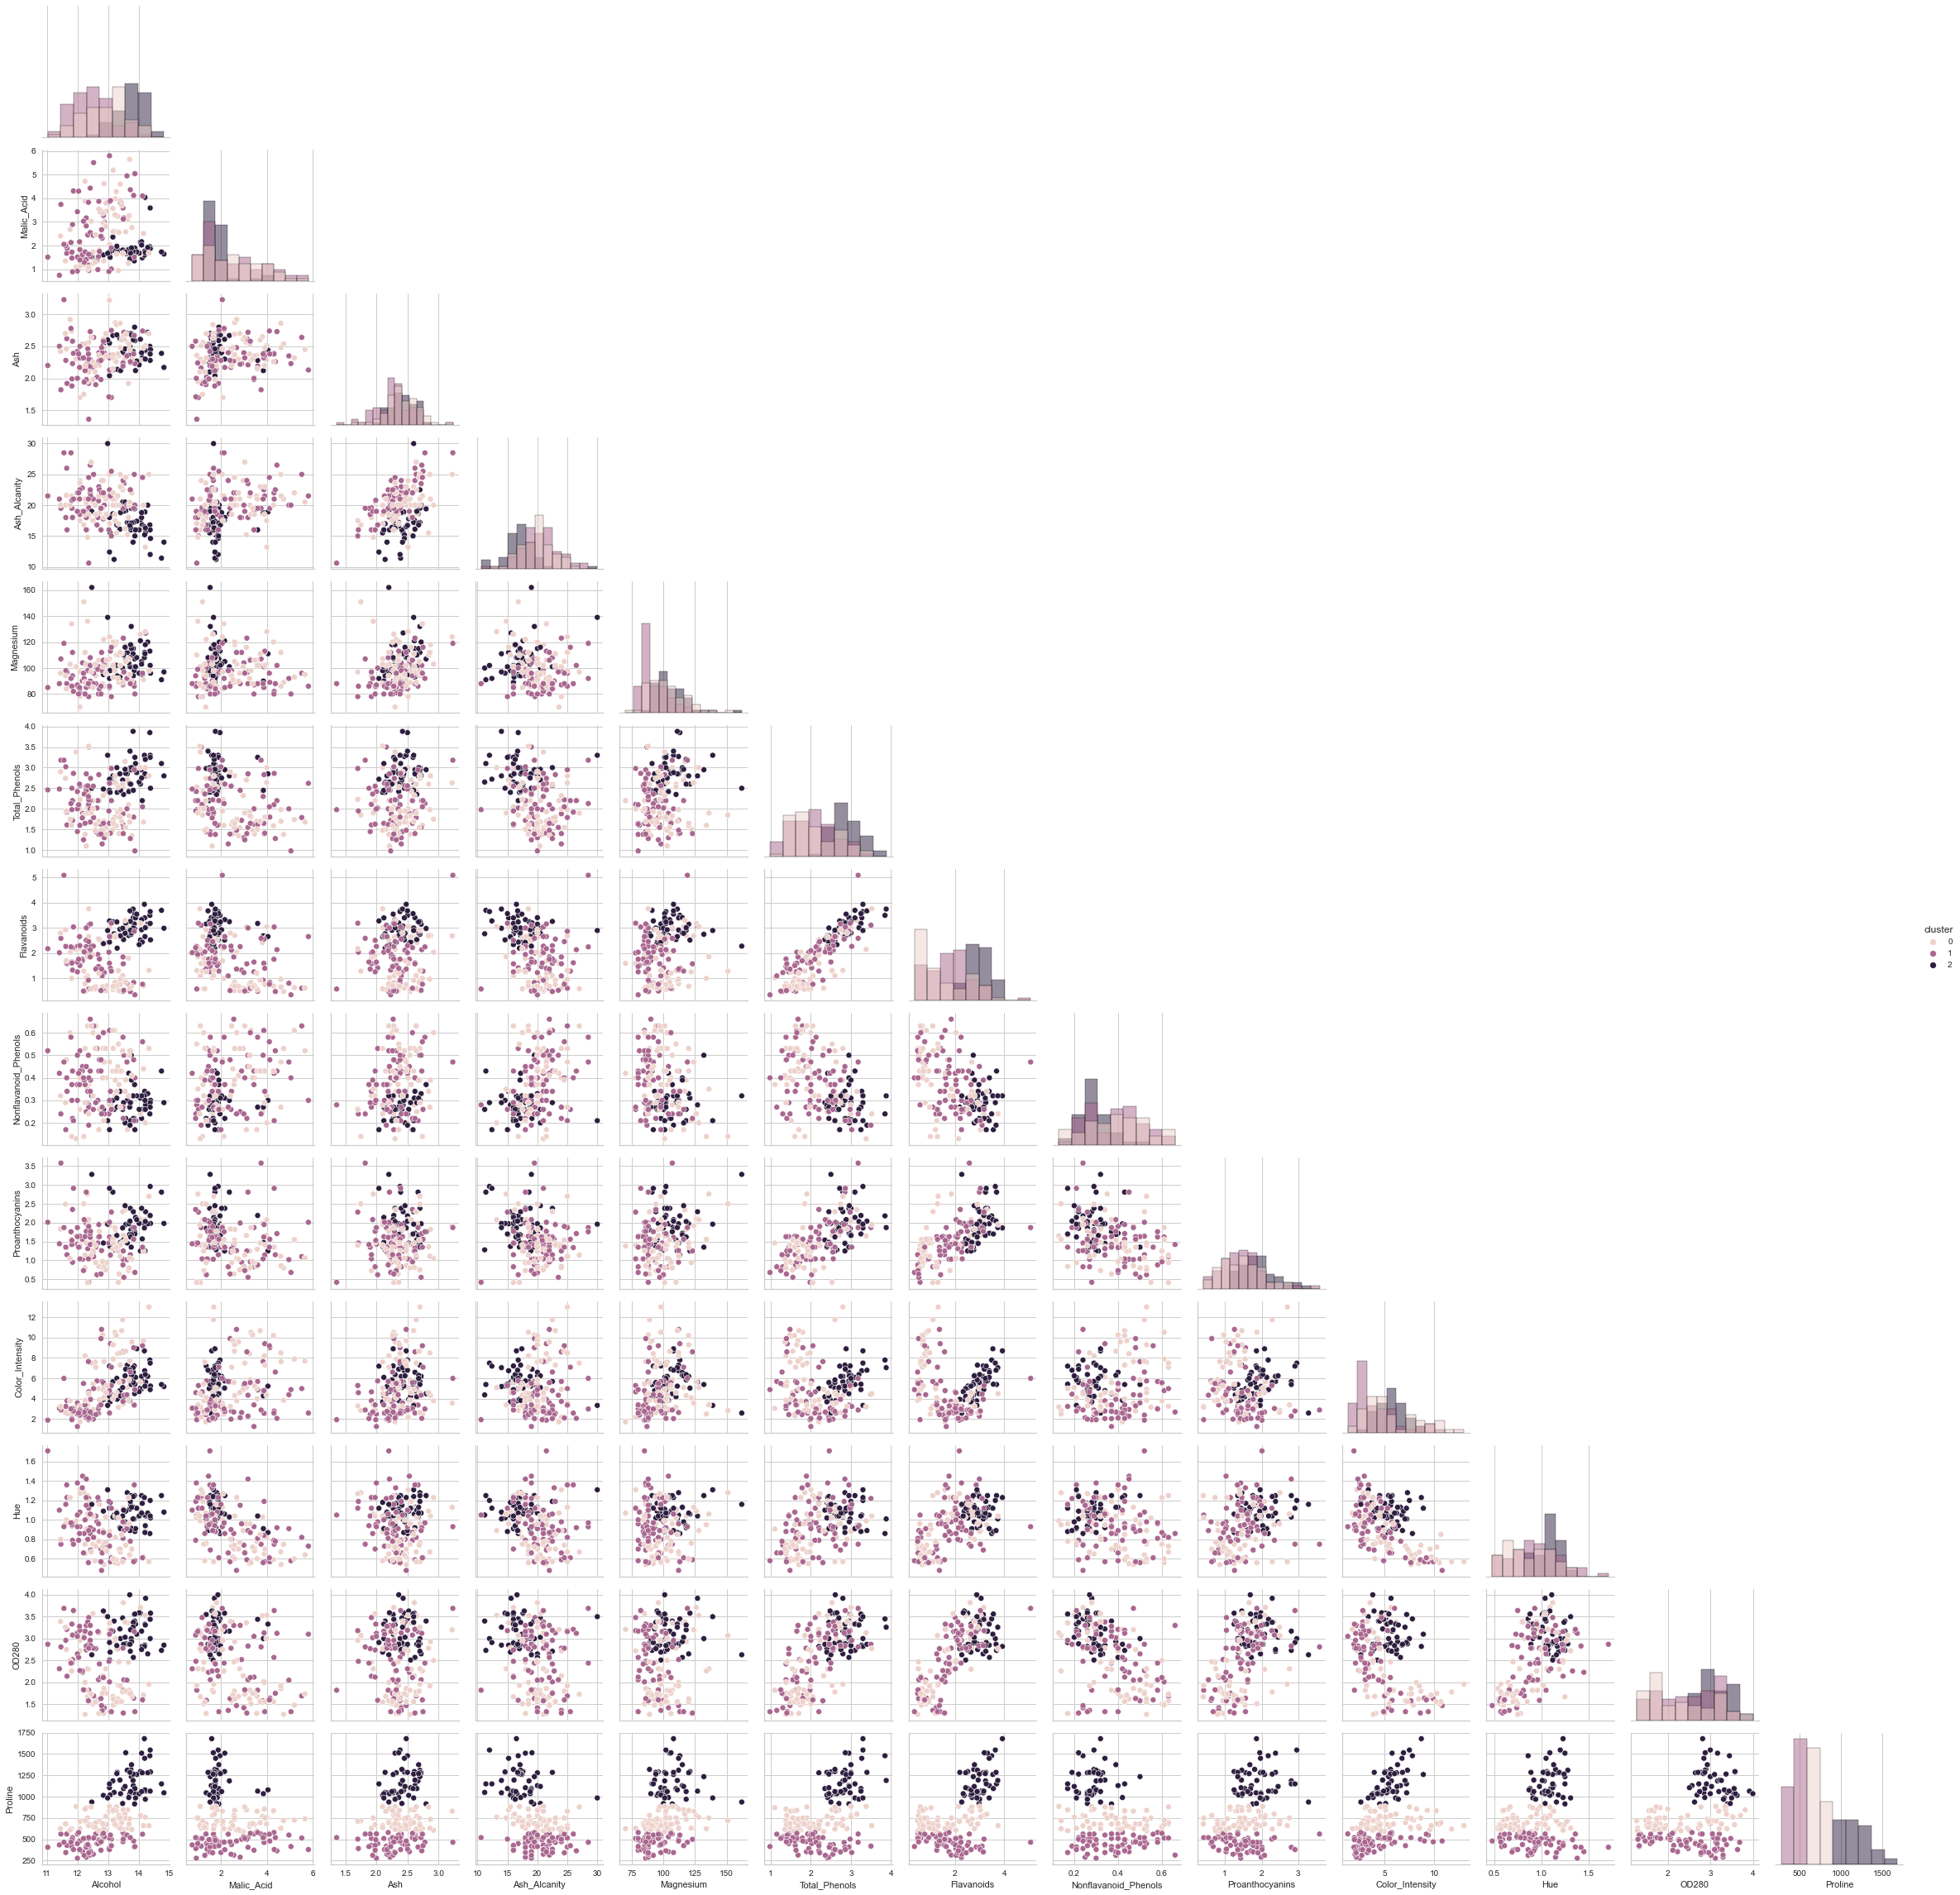

In [ ]:
# Visualize the correlation your data and identify variables for further analysis
# g = sns.PairGrid(metadata, hue="corona_result",corner=True)
g = sns.PairGrid(kmed, hue="cluster", corner=True)
g.map_diag(sns.histplot, color=".3")
g.map_offdiag(sns.scatterplot)
# g.map(sns.histplot)
# g.add_legend(title="", adjust_subtitles=True)
g.add_legend()

# Comparison

In [75]:
comparison=pd.concat([result_original, result_kmeans, result_kmedoids], axis=1)
comparison.drop(['all'], axis=1, inplace=True)
comparison.drop(['cluster', 'cultivars', 'cluster for kmeans'], axis=0, inplace=True)
comparison.columns=['original cluster 0', 'original cluster 1', 'original cluster 2', 'kmeans cluster 0', 'kmeans cluster 1', 'kmeans cluster 2', 'kmedoids cluster 0', 'kmedoids cluster 1', 'kmedoids cluster 2']
comparison

original cluster 0  original cluster 1  \
count                          59.000000           71.000000   
Alcohol                        13.744746           12.278732   
Malic_Acid                      2.010678            1.932676   
Ash                             2.455593            2.244789   
Ash_Alcanity                   17.037288           20.238028   
Magnesium                     106.338983           94.549296   
Total_Phenols                   2.840169            2.258873   
Flavanoids                      2.982373            2.080845   
Nonflavanoid_Phenols            0.290000            0.363662   
Proanthocyanins                 1.899322            1.630282   
Color_Intensity                 5.528305            3.086620   
Hue                             1.062034            1.056282   
OD280                           3.157797            2.785352   
Proline                      1115.711864          519.507042   

                      original cluster 2  kmeans cluster 0  kmeans cluster 1  \
count                          48.000000         69.000000         62.000000   
Alcohol                        13.153750         12.516667         12.929839   
Malic_Acid                      3.333750          2.494203          2.504032   
Ash                             2.437083          2.288551          2.408065   
Ash_Alcanity                   21.416667         20.823188         19.890323   
Magnesium                      99.312500         92.347826        103.596774   
Total_Phenols                   1.678750          2.070725          2.111129   
Flavanoids                      0.781458          1.758406          1.584032   
Nonflavanoid_Phenols            0.447500          0.390145          0.388387   
Proanthocyanins                 1.153542          1.451884          1.503387   
Color_Intensity                 7.396250          4.086957          5.650323   
Hue                             0.682708          0.941159          0.883968   
OD280                           1.683542          2.490725          2.365484   
Proline                       629.895833        458.231884        728.338710   

                      kmeans cluster 2  kmedoids cluster 0  \
count                        47.000000           60.000000   
Alcohol                      13.804468           12.911167   
Malic_Acid                    1.883404            2.549667   
Ash                           2.426170            2.408333   
Ash_Alcanity                 17.023404           19.971667   
Magnesium                   105.510638          102.583333   
Total_Phenols                 2.867234            2.084333   
Flavanoids                    3.014255            1.509833   
Nonflavanoid_Phenols          0.285319            0.394333   
Proanthocyanins               1.910426            1.452000   
Color_Intensity               5.702553            5.717333   
Hue                           1.078298            0.870767   
OD280                         3.114043            2.321833   
Proline                    1195.148936          716.250000   

                      kmedoids cluster 1  kmedoids cluster 2  
count                          68.000000             50.0000  
Alcohol                        12.511912             13.7726  
Malic_Acid                      2.487353              1.8750  
Ash                             2.283824              2.4288  
Ash_Alcanity                   20.776471             17.1800  
Magnesium                      92.220588            106.5600  
Total_Phenols                   2.067059              2.8582  
Flavanoids                      1.775441              2.9978  
Nonflavanoid_Phenols            0.388088              0.2872  
Proanthocyanins                 1.461324              1.9338  
Color_Intensity                 4.074706              5.6044  
Hue                             0.941912              1.0826  
OD280                           2.495735              3.1172  
Proline                       456.294118       

In [76]:
print(comparison.corr())

                    original cluster 0  original cluster 1  \
original cluster 0            1.000000            0.993511   
original cluster 1            0.993511            1.000000   
original cluster 2            0.997901            0.997971   
kmeans cluster 0              0.990749            0.999743   
kmeans cluster 1              0.998535            0.998096   
kmeans cluster 2              0.999893            0.991862   
kmedoids cluster 0            0.998526            0.998061   
kmedoids cluster 1            0.990828            0.999750   
kmedoids cluster 2            0.999939            0.992300   

                    original cluster 2  kmeans cluster 0  kmeans cluster 1  \
original cluster 0            0.997901          0.990749          0.998535   
original cluster 1            0.997971          0.999743          0.998096   
original cluster 2            1.000000          0.996615          0.999801   
kmeans cluster 0              0.996615          1.000000          0

## KMeans分錯

|Original |KMeans|KMedoids|
|-----|--------|----|
|0|2       |2|
|1  |0      |1|
|2|1|0|

In [55]:
metadata

cultivars  Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  \
0            1    14.23        1.71  2.43          15.6        127   
1            1    13.20        1.78  2.14          11.2        100   
2            1    13.16        2.36  2.67          18.6        101   
3            1    14.37        1.95  2.50          16.8        113   
4            1    13.24        2.59  2.87          21.0        118   
..         ...      ...         ...   ...           ...        ...   
173          3    13.71        5.65  2.45          20.5         95   
174          3    13.40        3.91  2.48          23.0        102   
175          3    13.27        4.28  2.26          20.0        120   
176          3    13.17        2.59  2.37          20.0        120   
177          3    14.13        4.10  2.74          24.5         96   

     Total_Phenols  Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  \
0             2.80        3.06                  0.28             2.29   
1             2.65        2.76                  0.26             1.28   
2             2.80        3.24                  0.30             2.81   
3             3.85        3.49                  0.24             2.18   
4             2.80        2.69                  0.39             1.82   
..             ...         ...                   ...              ...   
173           1.68        0.61                  0.52             1.06   
174           1.80        0.75                  0.43             1.41   
175           1.59        0.69                  0.43             1.35   
176           1.65        0.68                  0.53             1.46   
177           2.05        0.76                  0.56             1.35   

     Color_Intensity   Hue  OD280  Proline  cluster for kmeans  \
0               5.64  1.04   3.92     1065                   2   
1               4.38  1.05   3.40     1050                   2   
2               5.68  1.03   3.17     1185                   2   
3               7.80  0.86   3.45     1480                   2   
4               4.32  1.04   2.93      735                   1   
..               ...   ...    ...      ...                 ...   
173             7.70  0.64   1.74      740                   1   
174             7.30  0.70   1.56      750                   1   
175            10.20  0.59   1.56      835                   1   
176             9.30  0.60   1.62      840                   1   
177             9.20  0.61   1.60      560                   0   

     cluster for kmedoids  
0                       2  
1                       2  
2                       2  
3                       2  
4                       0  
..                    ...  
173                     0  
174                     0  
175                     0  
176                     0  
177                     1  

[178 rows x 16 columns]

### original = 0

In [56]:
com_1_0=metadata[(metadata['cultivars']==1) & (metadata['cluster for kmeans']==0)]
com_1_0.shape

(0, 16)

In [57]:
com_1_1=metadata[(metadata['cultivars']==1) & (metadata['cluster for kmeans']==1)]
com_1_1.shape

(13, 16)

In [58]:
com_0_2=metadata[(metadata['cultivars']==1) & (metadata['cluster for kmeans']==2)]
com_0_2.shape

(46, 16)

### original = 1

In [59]:
com_1_0=metadata[(metadata['cultivars']==2) & (metadata['cluster for kmeans']==0)]
com_1_0.shape

(50, 16)

In [60]:
com_1_1=metadata[(metadata['cultivars']==2) & (metadata['cluster for kmeans']==1)]
com_1_1.shape

(20, 16)

In [61]:
com_1_2=metadata[(metadata['cultivars']==2) & (metadata['cluster for kmeans']==2)]
com_1_2.shape

(1, 16)

### original = 2

In [62]:
com_2_0=metadata[(metadata['cultivars']==3) & (metadata['cluster for kmeans']==0)]
com_2_0.shape

(19, 16)

In [63]:
com_2_1=metadata[(metadata['cultivars']==3) & (metadata['cluster for kmeans']==1)]
com_2_1.shape

(29, 16)

In [64]:
com_2_2=metadata[(metadata['cultivars']==3) & (metadata['cluster for kmeans']==2)]
com_2_2.shape

(0, 16)

## KMedoids 分錯

### original = 0

In [77]:
com_1_0=metadata[(metadata['cultivars']==1) & (metadata['cluster for kmedoids']==0)]
com_1_0.shape

(11, 16)

In [78]:
com_1_1=metadata[(metadata['cultivars']==1) & (metadata['cluster for kmedoids']==1)]
com_1_1.shape

(0, 16)

In [79]:
com_0_2=metadata[(metadata['cultivars']==1) & (metadata['cluster for kmedoids']==2)]
com_0_2.shape

(48, 16)

### original = 1

In [68]:
com_2_0=metadata[(metadata['cultivars']==2) & (metadata['cluster for kmedoids']==0)]
com_2_0.shape

(19, 16)

In [69]:
com_2_1=metadata[(metadata['cultivars']==2) & (metadata['cluster for kmedoids']==1)]
com_2_1.shape

(50, 16)

In [70]:
com_2_2=metadata[(metadata['cultivars']==2) & (metadata['cluster for kmedoids']==2)]
com_2_2.shape

(2, 16)

### original = 2

In [71]:
com_3_0=metadata[(metadata['cultivars']==3) & (metadata['cluster for kmedoids']==0)]
com_3_0.shape

(30, 16)

In [73]:
com_3_1=metadata[(metadata['cultivars']==3) & (metadata['cluster for kmedoids']==1)]
com_3_1.shape

(18, 16)

In [74]:
com_3_2=metadata[(metadata['cultivars']==3) & (metadata['cluster for kmedoids']==2)]
com_3_2.shape

(0, 16)

# Hierarchical Clustering

In [ ]:
hc=sch.linkage(metadata, metric='euclidean', method='ward')

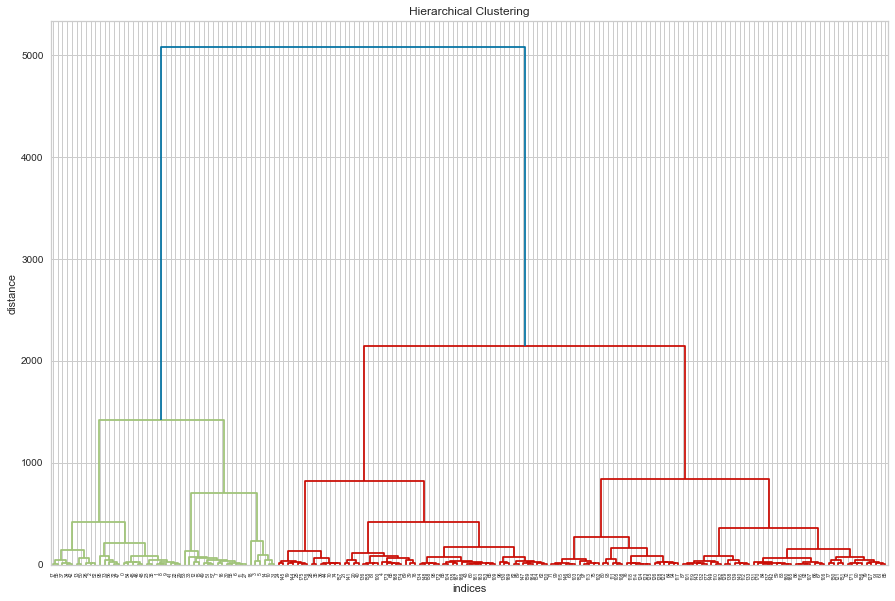

In [ ]:
plt.figure(figsize = (15, 10))
sch.dendrogram(hc)
plt.title('Hierarchical Clustering')
plt.xlabel('indices')
plt.ylabel('distance')
plt.show()

{'icoord': [[15.0, 15.0, 25.0, 25.0], [5.0, 5.0, 20.0, 20.0]],
 'dcoord': [[0.0, 2141.829867290135, 2141.829867290135, 0.0],
  [0.0, 5078.327100564659, 5078.327100564659, 2141.829867290135]],
 'ivl': ['(48)', '(58)', '(72)'],
 'leaves': [352, 350, 351],
 'color_list': ['C1', 'C0'],
 'leaves_color_list': ['C0', 'C1', 'C1']}

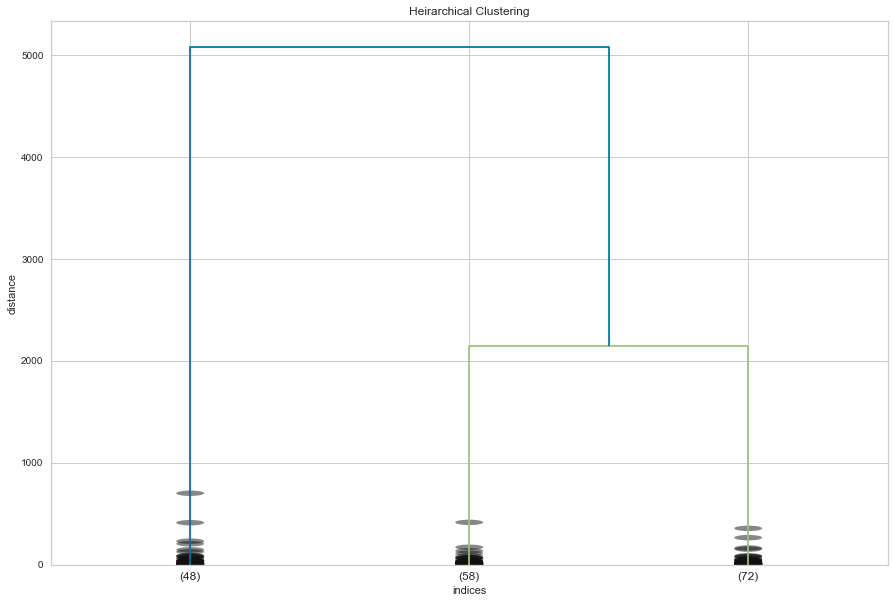

In [ ]:
plt.figure(figsize = (15, 10))
plt.title("Heirarchical Clustering")
plt.xlabel('indices')
plt.ylabel('distance')
sch.dendrogram(hc,
          truncate_mode="lastp",
          p = 3,
          show_contracted=True)

In [ ]:
hierarchical  = AgglomerativeClustering(n_clusters = 3,
                                  affinity= "euclidean",
                                  linkage = "ward").fit_predict(metadata)

In [ ]:
dfff = metadata.copy()
dfff["cluster"] = hierarchical
dfff[0:5]

Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   
3    14.37        1.95  2.50          16.8        113           3.85   
4    13.24        2.59  2.87          21.0        118           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280  Proline  cluster  
0   3.92     1065        0  
1   3.40     1050        0  
2   3.17     1185        0  
3   3.45     1480        0  
4   2.93      735        2

In [ ]:
cluster0=dfff[dfff['cluster']==0]
cluster0.insert(0, 'count', len(cluster0.index))
cluster0=cluster0.mean(axis=0)
cluster0

count                     48.000000
Alcohol                   13.776667
Malic_Acid                 1.875833
Ash                        2.421458
Ash_Alcanity              17.064583
Magnesium                106.687500
Total_Phenols              2.859583
Flavanoids                 2.998750
Nonflavanoid_Phenols       0.286042
Proanthocyanins            1.938958
Color_Intensity            5.637917
Hue                        1.080000
OD280                      3.103958
Proline                 1189.770833
cluster                    0.000000
dtype: float64

In [ ]:
cluster1=dfff[dfff['cluster']==1]
cluster1.insert(0, 'count', len(cluster1.index))
cluster1=cluster1.mean(axis=0)
cluster1

count                    72.000000
Alcohol                  12.514444
Malic_Acid                2.515833
Ash                       2.304028
Ash_Alcanity             20.823611
Magnesium                92.736111
Total_Phenols             2.053750
Flavanoids                1.736944
Nonflavanoid_Phenols      0.391944
Proanthocyanins           1.428056
Color_Intensity           4.102778
Hue                       0.940556
OD280                     2.471667
Proline                 464.236111
cluster                   1.000000
dtype: float64

In [ ]:
cluster2=dfff[dfff['cluster']==2]
cluster2.insert(0, 'count', len(cluster2.index))
cluster2=cluster2.mean(axis=0)
cluster2

count                    58.000000
Alcohol                  12.961897
Malic_Acid                2.494655
Ash                       2.398621
Ash_Alcanity             19.856897
Magnesium               102.689655
Total_Phenols             2.127586
Flavanoids                1.589828
Nonflavanoid_Phenols      0.387241
Proanthocyanins           1.505000
Color_Intensity           5.764138
Hue                       0.877000
OD280                     2.378103
Proline                 731.258621
cluster                   2.000000
dtype: float64

In [ ]:
result_hc=pd.concat([all, cluster0, cluster1, cluster2], axis=1, join='inner')
result_hc.columns=['all', 'cluster 0', 'cluster 1', 'cluster 2']
result_hc.drop('cluster')

all    cluster 0   cluster 1   cluster 2
count                 178.000000    48.000000   72.000000   58.000000
Alcohol                13.000618    13.776667   12.514444   12.961897
Malic_Acid              2.336348     1.875833    2.515833    2.494655
Ash                     2.366517     2.421458    2.304028    2.398621
Ash_Alcanity           19.494944    17.064583   20.823611   19.856897
Magnesium              99.741573   106.687500   92.736111  102.689655
Total_Phenols           2.295112     2.859583    2.053750    2.127586
Flavanoids              2.029270     2.998750    1.736944    1.589828
Nonflavanoid_Phenols    0.361854     0.286042    0.391944    0.387241
Proanthocyanins         1.590899     1.938958    1.428056    1.505000
Color_Intensity         5.058090     5.637917    4.102778    5.764138
Hue                     0.957449     1.080000    0.940556    0.877000
OD280                   2.611685     3.103958    2.471667    2.378103
Proline               746.893258  1189.770833  464.236111  731.258621

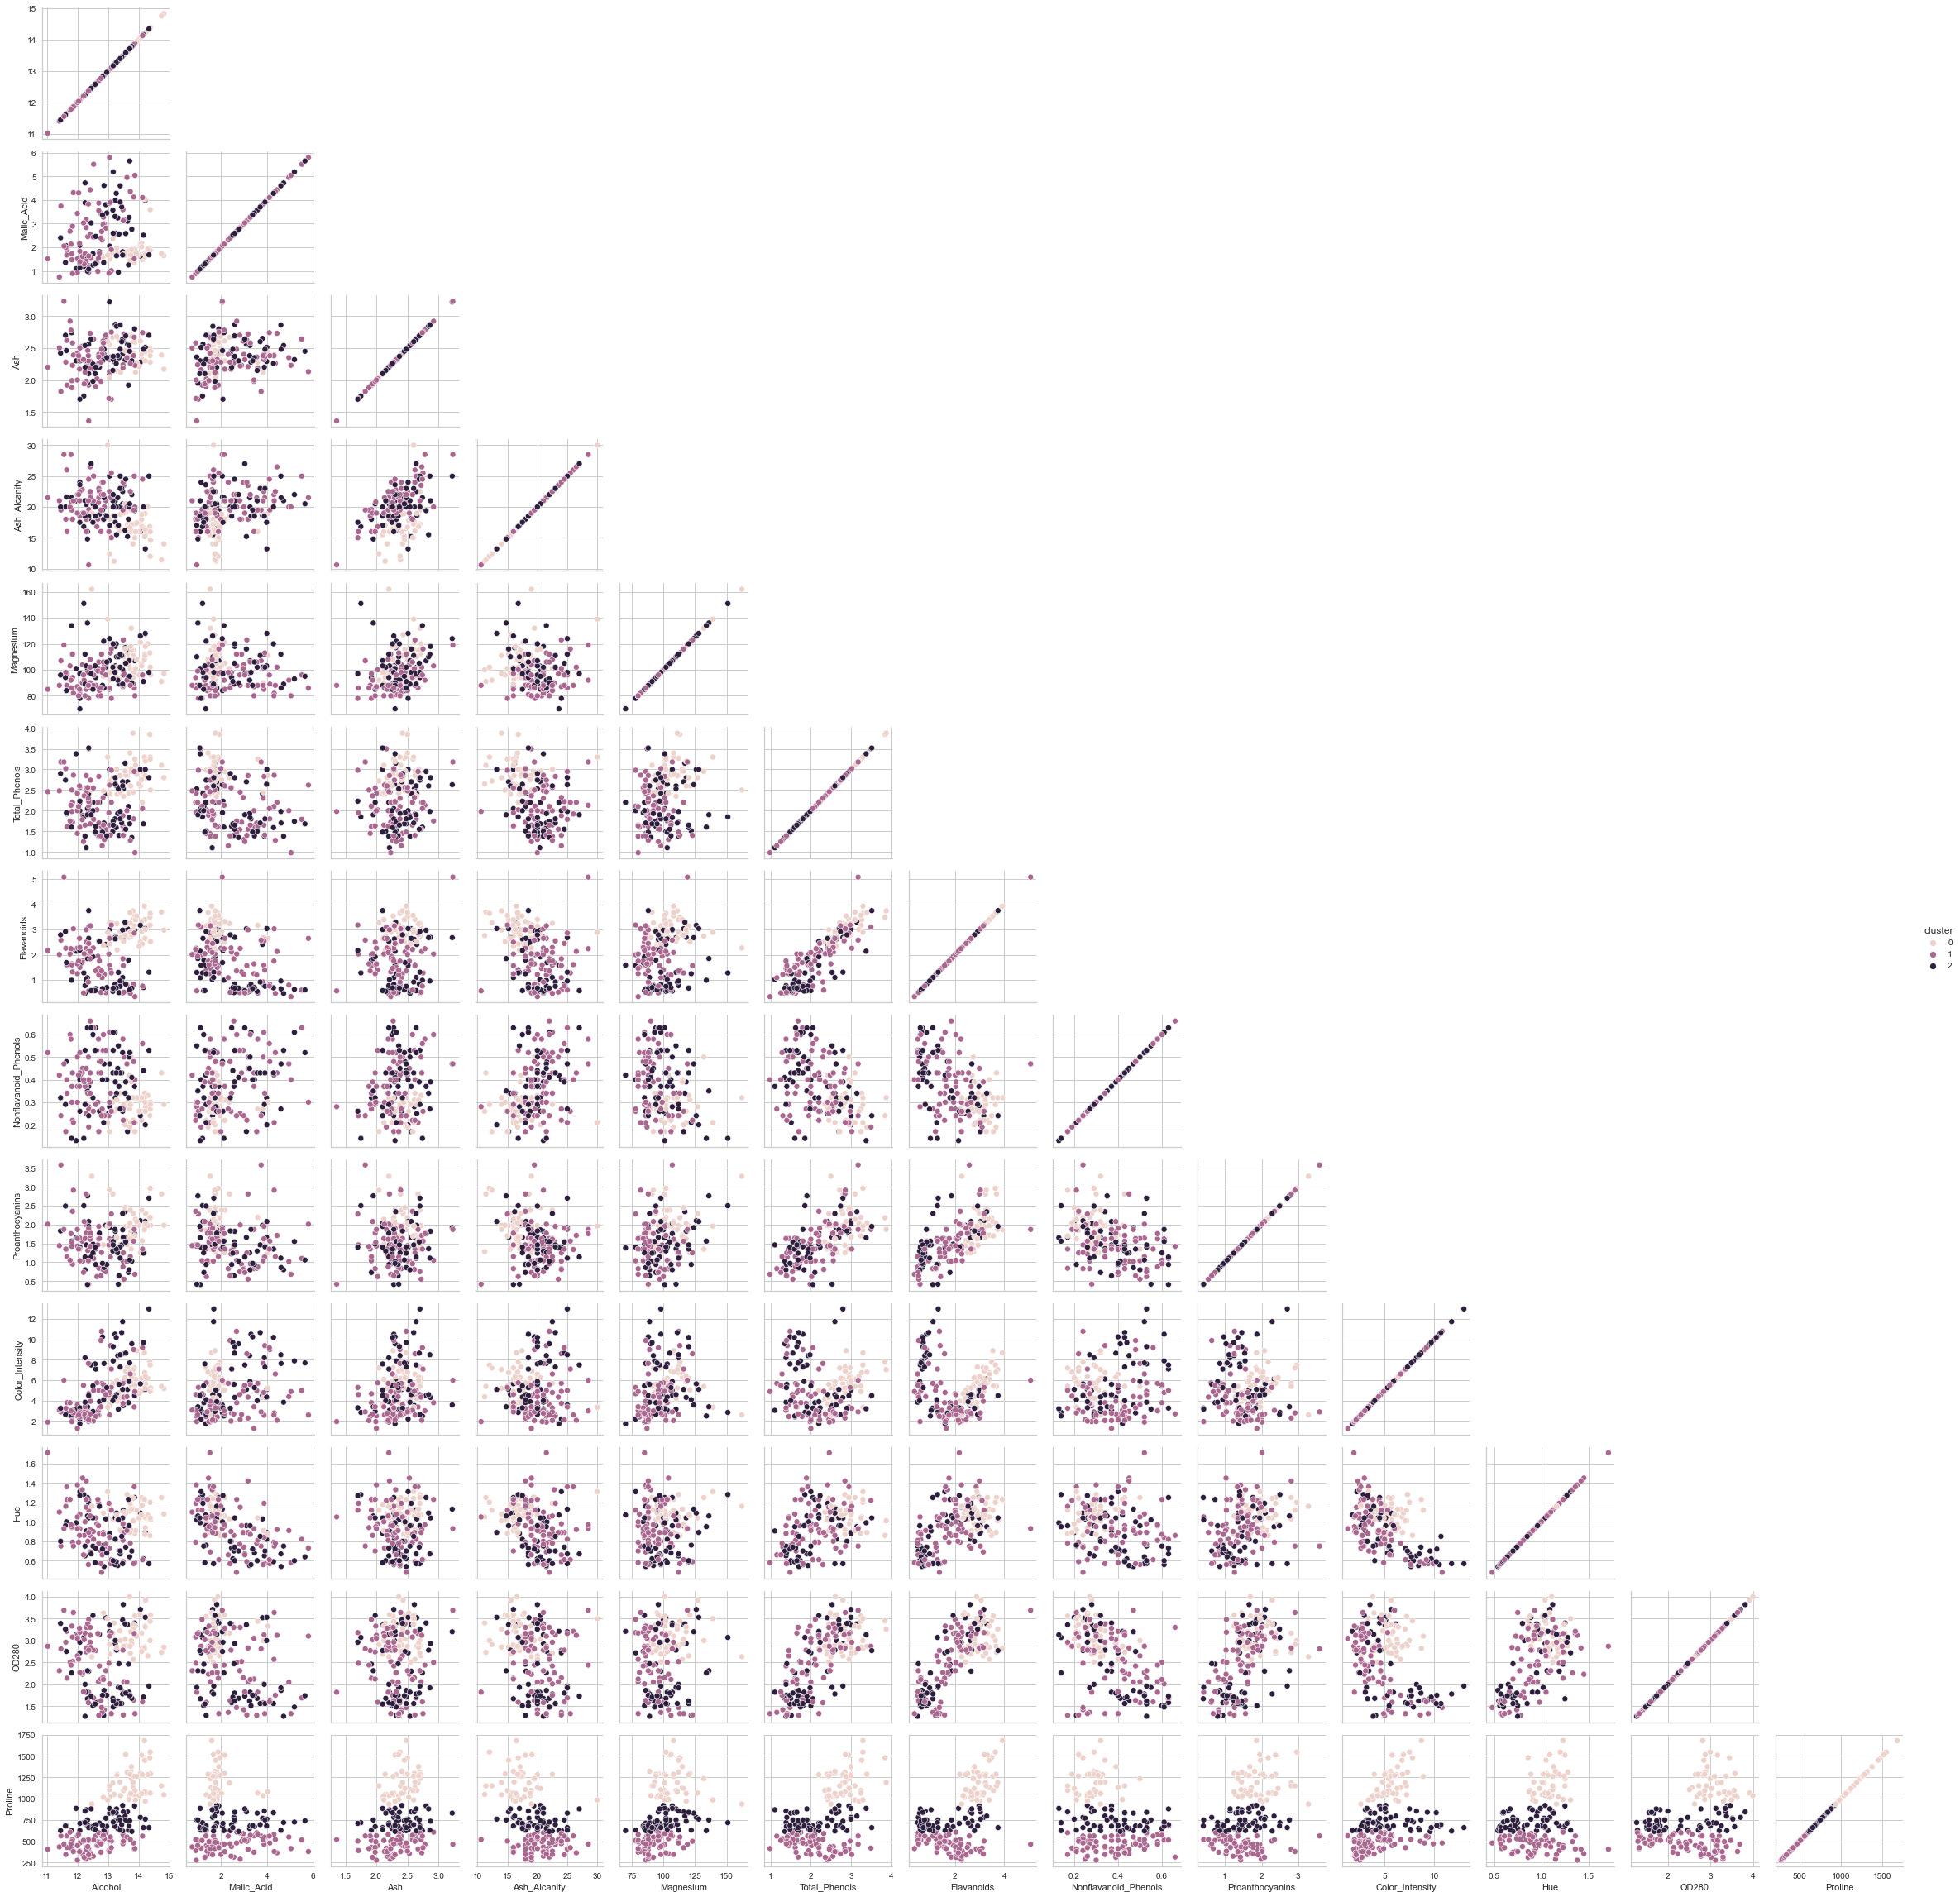

In [ ]:
# Visualize the correlation your data and identify variables for further analysis
# g = sns.PairGrid(metadata, hue="corona_result",corner=True)
g = sns.PairGrid(dfff, hue="cluster", corner=True)
g.map_diag(sns.histplot, color=".3")
g.map_offdiag(sns.scatterplot)
# g.map(sns.histplot)
# g.add_legend(title="", adjust_subtitles=True)
g.add_legend()

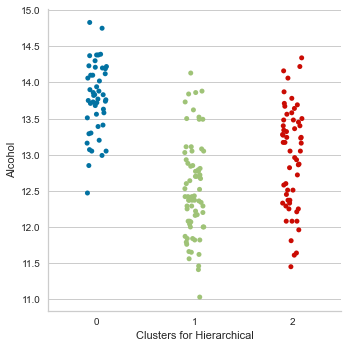

In [ ]:
sns.catplot(x = "Clusters for Hierarchical", y = "Alcohol", data = dfff)

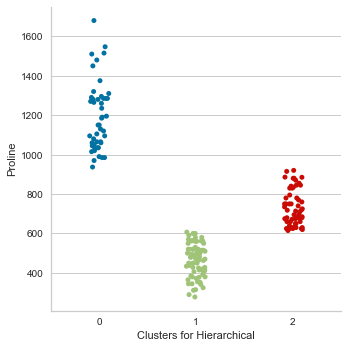

In [ ]:
sns.catplot(x = "Clusters for Hierarchical", y = "Proline", data = dfff)

# DBSCAN

In [ ]:
# neighbors = 6
# # X_embedded is your data
# ns=neighbors
# nbrs = NearestNeighbors(n_neighbors=neighbors ).fit(metadata)
# distances, indices = nbrs.kneighbors(metadata)
# distance_desc = sorted(distances[:,ns-1], reverse=True)
# px.line(x=list(range(1,len(distance_desc )+1)),y= distance_desc )

In [ ]:
# dbscan=DBSCAN(eps=20, min_samples=6).fit(metadata)
# dbscan.labels_

array([-1,  0, -1, -1, -1, -1,  1,  1,  0,  0, -1,  1, -1, -1, -1, -1,  1,
       -1, -1, -1, -1, -1,  0, -1, -1, -1, -1,  1, -1,  0,  1, -1, -1, -1,
       -1, -1,  5, -1,  0, -1, -1,  0, -1,  2,  5, -1,  0, -1,  0,  1, -1,
        1, -1, -1,  0, -1, -1,  1,  1,  3,  2,  3,  4,  3, -1,  2,  3,  3,
       -1, -1,  5,  3,  3, -1,  5,  3,  3,  3, -1,  3, -1, -1,  4,  3,  3,
        3,  3,  6,  2,  4,  3,  3,  3, -1, -1, -1, -1,  3,  2,  3,  2,  6,
        3,  3,  2, -1,  3,  3, -1,  2,  6, -1,  4,  3,  3,  3,  3, -1,  3,
        6,  4,  3, -1,  3,  3,  3, -1,  3, -1,  6, -1,  3,  6,  4,  2,  2,
       -1,  3,  6,  4,  4, -1,  3,  6,  5, -1,  3,  4,  2,  6, -1, -1, -1,
        2,  2, -1,  3,  5,  2,  4,  3,  2,  6,  2,  4,  3,  2,  2, -1,  4,
        3,  3,  2, -1, -1, -1, -1,  6], dtype=int64)

In [ ]:
# result=metadata.copy()
# result['cluster']=dbscan.labels_
# result

Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0      14.23        1.71  2.43          15.6        127           2.80   
1      13.20        1.78  2.14          11.2        100           2.65   
2      13.16        2.36  2.67          18.6        101           2.80   
3      14.37        1.95  2.50          16.8        113           3.85   
4      13.24        2.59  2.87          21.0        118           2.80   
..       ...         ...   ...           ...        ...            ...   
173    13.71        5.65  2.45          20.5         95           1.68   
174    13.40        3.91  2.48          23.0        102           1.80   
175    13.27        4.28  2.26          20.0        120           1.59   
176    13.17        2.59  2.37          20.0        120           1.65   
177    14.13        4.10  2.74          24.5         96           2.05   

     Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0          3.06                  0.28             2.29             5.64  1.04   
1          2.76                  0.26             1.28             4.38  1.05   
2          3.24                  0.30             2.81             5.68  1.03   
3          3.49                  0.24             2.18             7.80  0.86   
4          2.69                  0.39             1.82             4.32  1.04   
..          ...                   ...              ...              ...   ...   
173        0.61                  0.52             1.06             7.70  0.64   
174        0.75                  0.43             1.41             7.30  0.70   
175        0.69                  0.43             1.35            10.20  0.59   
176        0.68                  0.53             1.46             9.30  0.60   
177        0.76                  0.56             1.35             9.20  0.61   

     OD280  Proline  cluster  
0     3.92     1065       -1  
1     3.40     1050        0  
2     3.17     1185       -1  
3     3.45     1480       -1  
4     2.93      735       -1  
..     ...      ...      ...  
173   1.74      740       -1  
174   1.56      750       -1  
175   1.56      835       -1  
176   1.62      840       -1  
177   1.60      560        6  

[178 rows x 14 columns]

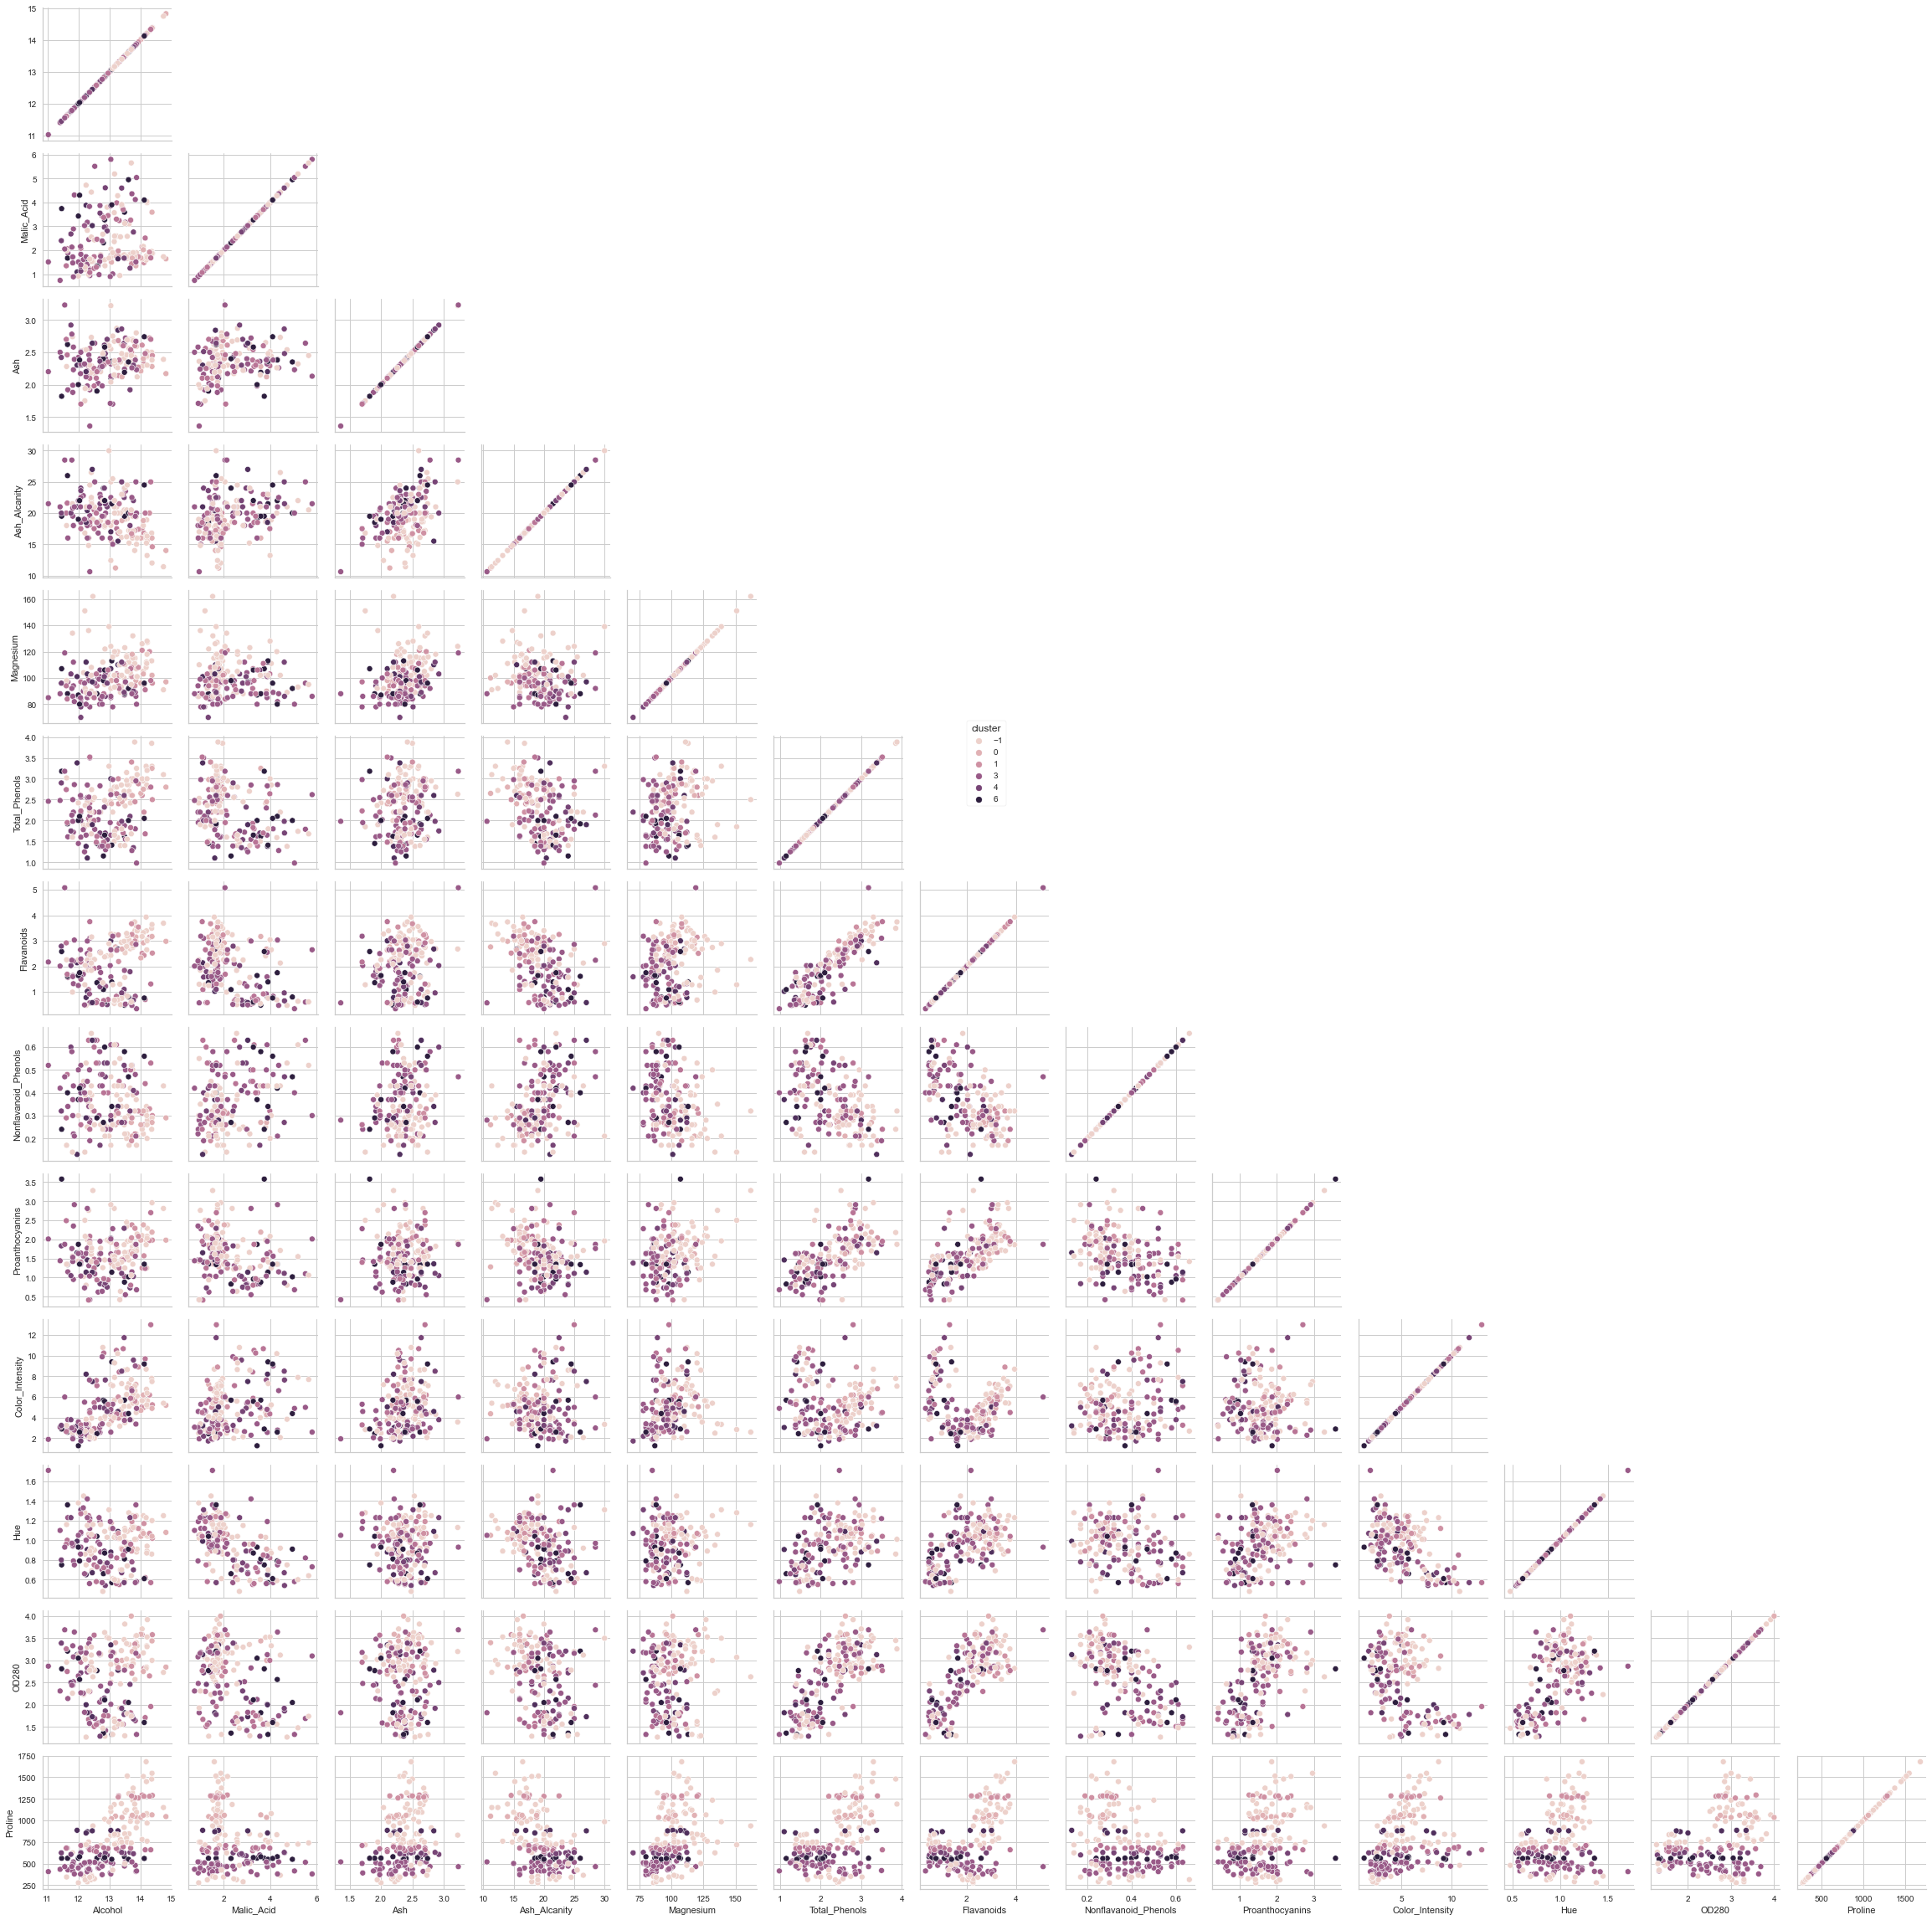

In [ ]:
# # Visualize the correlation your data and identify variables for further analysis
# # g = sns.PairGrid(metadata, hue="corona_result",corner=True)
# g = sns.PairGrid(result, hue="cluster", corner=True)
# g.map(sns.scatterplot)
# # g.map(sns.histplot)
# # g.add_legend(title="", adjust_subtitles=True)
# g.add_legend(frameon=True, bbox_to_anchor=(.5, .6), loc='center', title='cluster')

In [ ]:
# result1=result.copy()
# result1.drop(result1.loc[result1['cluster']==-1].index, inplace=True)
# result1.sort_values(by='cluster')

Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
1      13.20        1.78  2.14          11.2        100           2.65   
48     14.10        2.02  2.40          18.8        103           2.75   
46     14.38        3.59  2.28          16.0        102           3.25   
54     13.74        1.67  2.25          16.4        118           2.60   
41     13.41        3.84  2.12          18.8         90           2.45   
..       ...         ...   ...           ...        ...            ...   
138    13.49        3.59  2.19          19.5         88           1.62   
87     11.65        1.67  2.62          26.0         88           1.92   
132    12.81        2.31  2.40          24.0         98           1.15   
101    12.60        1.34  1.90          18.5         88           1.45   
177    14.13        4.10  2.74          24.5         96           2.05   

     Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
1          2.76                  0.26             1.28             4.38  1.05   
48         2.92                  0.32             2.38             6.20  1.07   
46         3.17                  0.27             2.19             4.90  1.04   
54         2.90                  0.21             1.62             5.85  0.92   
41         2.68                  0.27             1.48             4.28  0.91   
..          ...                   ...              ...              ...   ...   
138        0.48                  0.58             0.88             5.70  0.81   
87         1.61                  0.40             1.34             2.60  1.36   
132        1.09                  0.27             0.83             5.70  0.66   
101        1.36                  0.29             1.35             2.45  1.04   
177        0.76                  0.56             1.35             9.20  0.61   

     OD280  Proline  cluster  
1     3.40     1050        0  
48    2.75     1060        0  
46    3.44     1065        0  
54    3.20     1060        0  
41    3.00     1035        0  
..     ...      ...      ...  
138   1.82      580        6  
87    3.21      562        6  
132   1.36      560        6  
101   2.77      562        6  
177   1.60      560        6  

[111 rows x 14 columns]

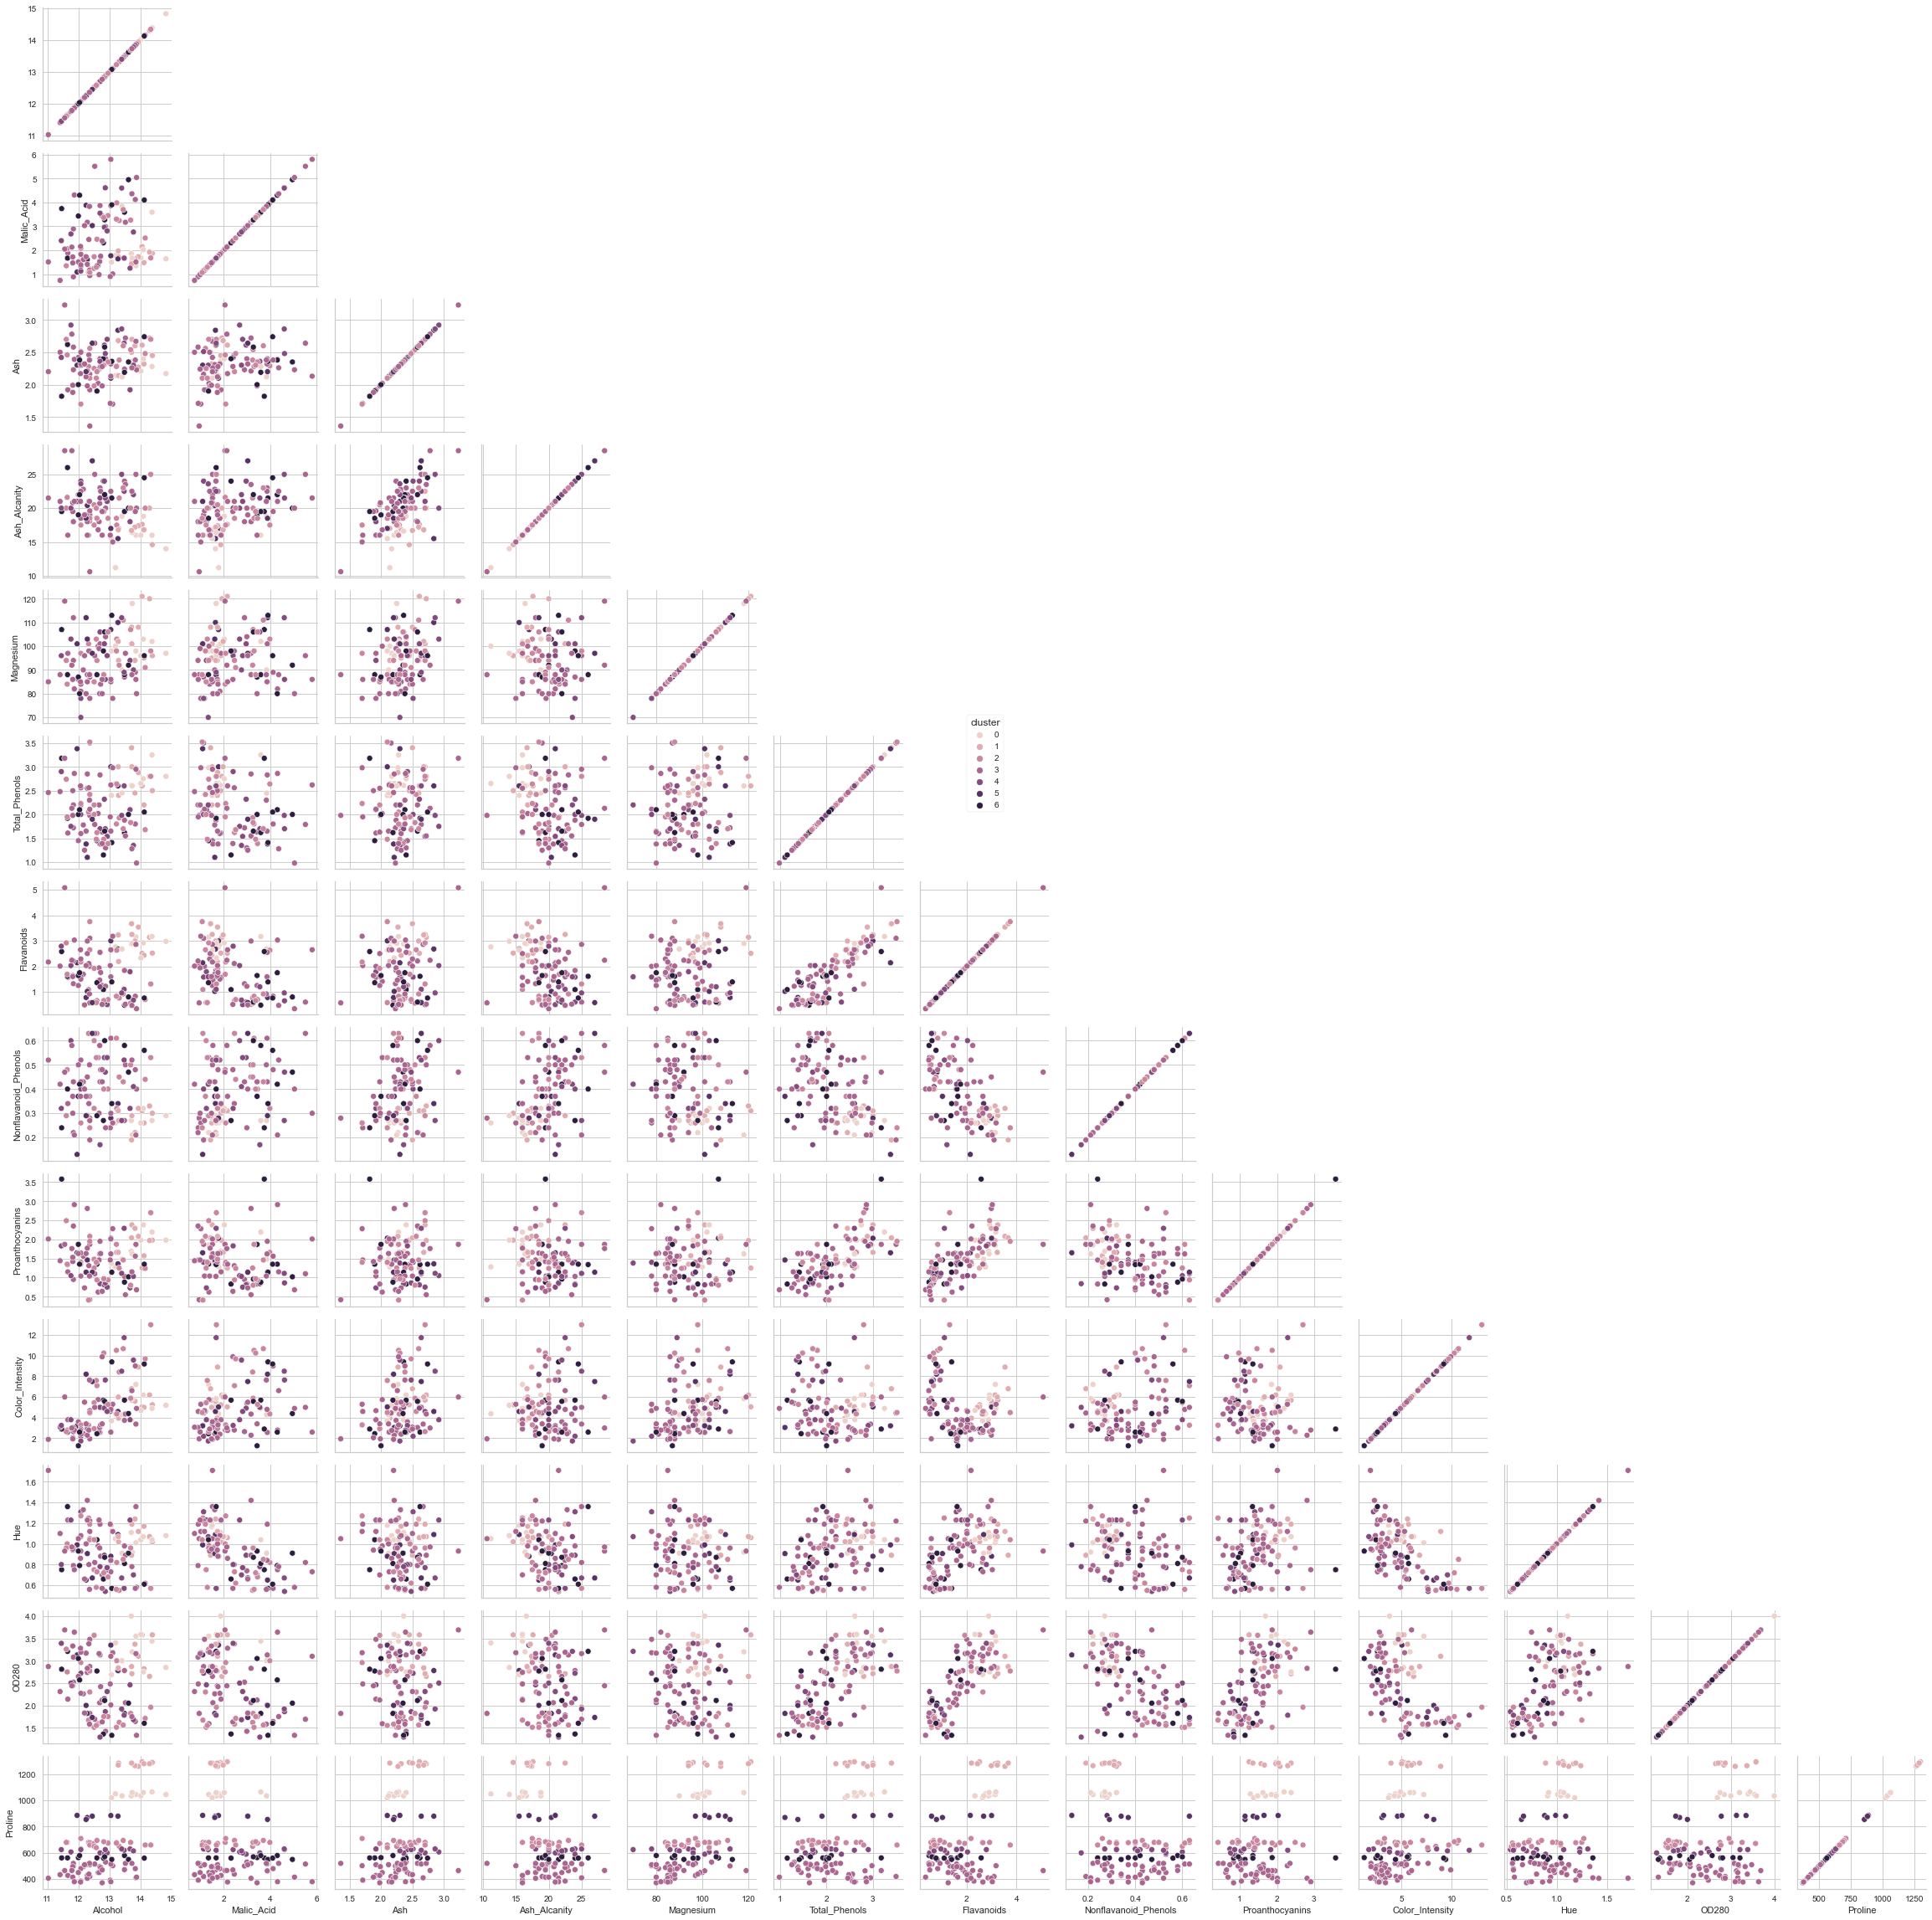

In [ ]:
# # Visualize the correlation your data and identify variables for further analysis
# # g = sns.PairGrid(metadata, hue="corona_result",corner=True)
# g = sns.PairGrid(result1, hue="cluster", corner=True)
# g.map(sns.scatterplot)
# # g.map(sns.histplot)
# # g.add_legend(title="", adjust_subtitles=True)
# g.add_legend(frameon=True, bbox_to_anchor=(.5, .6), loc='center', title='cluster')